In [2]:
import train as proteo_train
import os
import torch
import torch.nn.functional as F
import torch_geometric
from proteo.datasets.ftd import FTDDataset, reverse_log_transform
import torch.nn.functional as F
import pytorch_lightning as pl
from scipy.stats import zscore
from proteo.checkpoint_analysis import full_load_and_run_and_convert, process_checkpoints
%load_ext autoreload
%autoreload 2

weight_decay=0 wandb_api_key_path='wandb_api_key.txt' sex_specific_adj_choices=[True, False] lr=0.001327115054804925 q_gpu=True act_choices=['relu', 'tanh', 'sigmoid', 'elu'] l1_lambda_max=0.1 gat_v4_fc_dim=[[64, 128, 128, 32], [128, 256, 256, 64], [256, 512, 512, 128]] gcn_num_layers=[2, 3, 4] seed=21988 epochs=1000 ray_tmp_dir='/scratch/lcornelis/tmp' master_nodes=['sex', 'mutation', 'age'] cpu_per_worker=1 ray_results_dir='/scratch/lcornelis/outputs/ray_results' gat_v4_heads=[[2, 3], [2, 2], [4, 4]] reduction_factor=6 modality='csf' dropout=0.2 l1_lambda_min=1e-05 wandb_tmp_dir='/tmp' sex_specific_adj=False sync_batchnorm=False lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR'] gpu_per_worker=1 checkpoint_every_n_epochs_train=1 precision='32-true' num_to_keep=2 dataset_name='ftd' accumulate_grad_batches=1 gat_v4_hidden_channels=[[8, 16], [32, 64], [64, 128]] gat_heads=[1, 2, 4, 8] y_val='nfl' log_every_n_steps=10 lr_min=1e-06 batch_size_choices=[8,

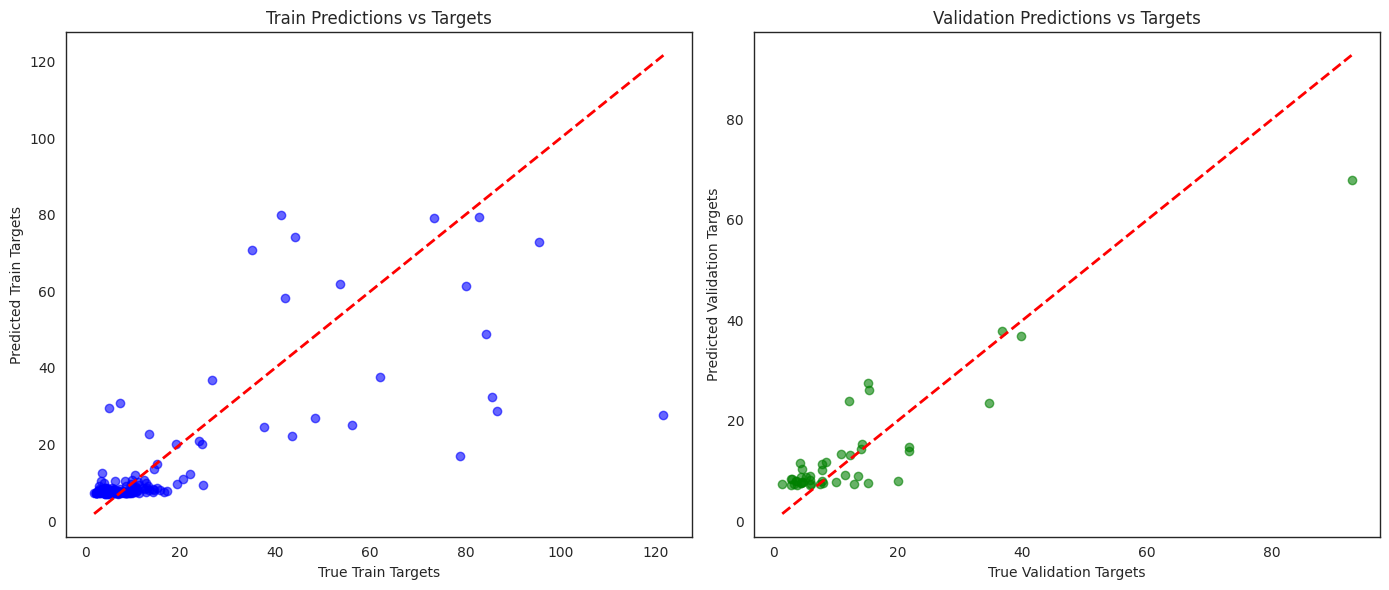

sex_choices=[['M', 'F']] gcn_num_layers=[2, 3, 4] dropout=0.2 wgcna_minModuleSize=10 num_workers=16 y_val='nfl' devices=[0, 1, 2, 3, 4, 5, 6, 7] grace_period=30 cpu_per_worker=1 gat-v4={'hidden_channels': [32, 64], 'heads': [2, 2], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation'], 'fc_dim': [128, 256, 256, 64], 'fc_dropout': 0.2, 'fc_act': 'tanh', 'weight_initializer': 'kaiming', 'num_layers': None, 'channel_list': None, 'norm': None, 'plain_last': None} accumulate_grad_batches=1 modality_choices=['csf'] nodes_count=1 mlp_norms=['batch_norm', 'layer_norm'] wandb_tmp_dir='/tmp' weight_decay=0 gcn={'num_layers': 3, 'hidden_channels': 32} pin_memory=True ray_tmp_dir='/scratch/lcornelis/tmp' wgcna_mergeCutHeight=0.25 output_dir='/scratch/lcornelis/outputs' lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR'] l1_lambda_max=0.1 gat_num_layers=[2, 4, 6, 12] num_samples=2000 model_grid_search=['gat-v4'] ray_results_dir='/

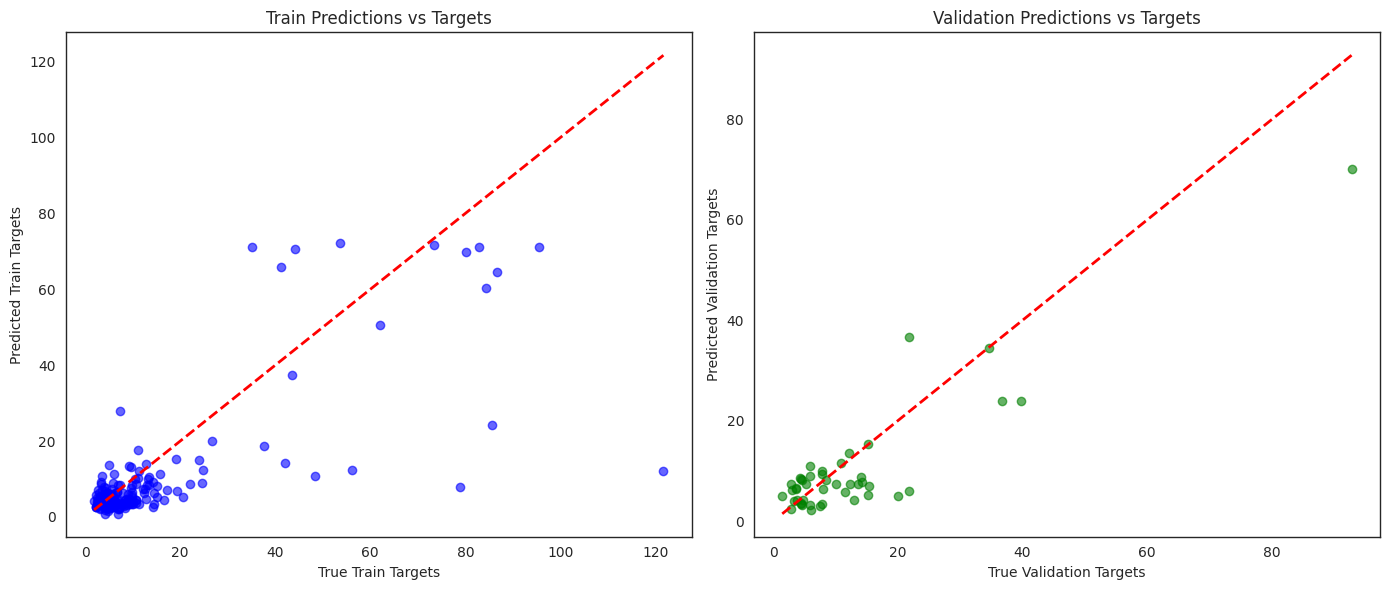

l1_lambda_max=0.1 checkpoint_every_n_epochs_train=1 mlp={'channel_list': [7261, 32, 64, 128, 1], 'norm': 'batch_norm', 'plain_last': True} raw_file_name='ALLFTD_dataset_for_nina_louisa_071124_age_adjusted.csv' dataset_name='ftd' use_progress_bar=True modality_choices=['csf'] epochs=1000 sex_specific_adj_choices=[True, False] wgcna_minModuleSize=10 precision='32-true' ray_results_dir='/scratch/lcornelis/outputs/ray_results' batch_size_choices=[8, 16, 32, 50] y_val_choices=['nfl'] mlp_channel_lists=[[7261, 1], [7261, 1028, 1], [7261, 128, 64, 1], [7261, 1028, 128, 1], [7261, 1028, 256, 64, 1], [7261, 1028, 512, 128, 1], [7261, 1028, 256, 128, 64, 1]] num_to_keep=2 gat={'num_layers': 2, 'hidden_channels': 256, 'heads': 4, 'v2': True} weight_decay=0 ray_tmp_dir='/scratch/lcornelis/tmp' num_samples=2000 act_choices=['relu', 'tanh', 'sigmoid', 'elu'] log_every_n_steps=10 checkpoint_dir='/scratch/lcornelis/outputs/checkpoints' model='gat-v4' adj_thresh=0.5 gat_num_layers=[2, 4, 6, 12] project

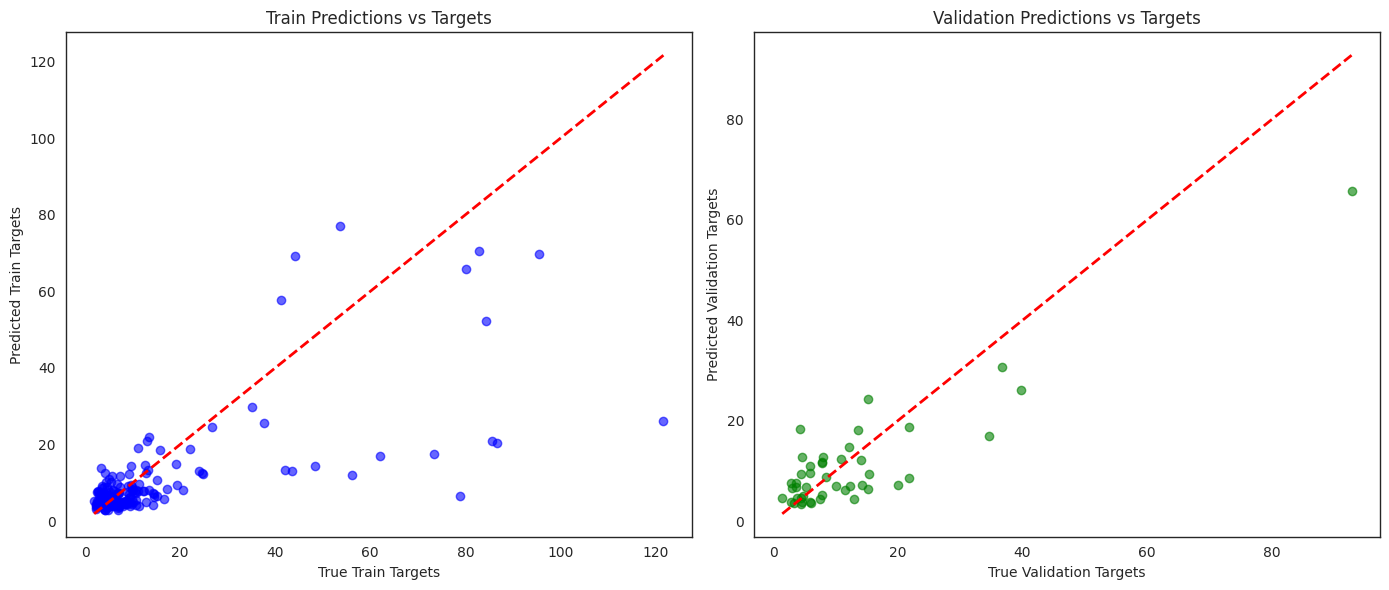

In [2]:
device = 'cpu' #'cuda' if torch.cuda.is_available() else 'cpu'

csf_all_no_log_mean= 14.254120261931426
csf_all_no_log_std = 19.742249678382503

# Without Age:
# Without Sex Specific Adj
model_1_no_age_no_sex = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-11-04_18-54-36/model=gat-v4,seed=21988_1567_act=elu,adj_thresh=0.3500,batch_size=16,dropout=0.2000,l1_lambda=0.0000,lr=0.0013,lr_scheduler=Cosine_2024-11-05_15-24-32/checkpoint_000105"
model_2_no_age_no_sex = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-11-04_18-54-36/model=gat-v4,seed=42389_2701_act=relu,adj_thresh=0.9000,batch_size=32,dropout=0.2000,l1_lambda=0.0004,lr=0.0029,lr_scheduler=Lambd_2024-11-06_07-56-01/checkpoint_000022"
model_3_no_age_no_sex = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-11-04_18-54-36/model=gat-v4,seed=49046_2947_act=sigmoid,adj_thresh=0.5000,batch_size=16,dropout=0.1000,l1_lambda=0.0004,lr=0.0018,lr_scheduler=Re_2024-11-06_11-46-42/checkpoint_000026"
outputs = full_load_and_run_and_convert(model_1_no_age_no_sex, device, csf_all_no_log_mean, csf_all_no_log_std)
outputs = full_load_and_run_and_convert(model_2_no_age_no_sex, device, csf_all_no_log_mean, csf_all_no_log_std)
outputs = full_load_and_run_and_convert(model_3_no_age_no_sex, device, csf_all_no_log_mean, csf_all_no_log_std)


act='relu' gat-v4={'hidden_channels': [8, 16], 'heads': [2, 3], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation'], 'fc_dim': [256, 512, 512, 128], 'fc_dropout': 0.2, 'fc_act': 'tanh', 'weight_initializer': 'orthogonal', 'num_layers': None, 'channel_list': None, 'norm': None, 'plain_last': None} master_nodes=['sex', 'mutation', 'age'] num_workers=16 sex_choices=[['M', 'F']] batch_size_choices=[8, 16, 32, 50] gat_v4_heads=[[2, 3], [2, 2], [4, 4]] raw_file_name='ALLFTD_dataset_for_nina_louisa_071124_age_adjusted.csv' sync_batchnorm=False wgcna_minModuleSize=10 gcn_num_layers=[2, 3, 4] weight_decay=0 nodes_count=1 wandb_tmp_dir='/tmp' dropout_choices=[0.1, 0.2, 0.5] checkpoint_dir='/scratch/lcornelis/outputs/checkpoints' mlp_channel_lists=[[7261, 1], [7261, 1028, 1], [7261, 128, 64, 1], [7261, 1028, 128, 1], [7261, 1028, 256, 64, 1], [7261, 1028, 512, 128, 1], [7261, 1028, 256, 128, 64, 1]] num_to_keep=2 sex_specific_adj=True gat={'num_layers': 2, 'hi

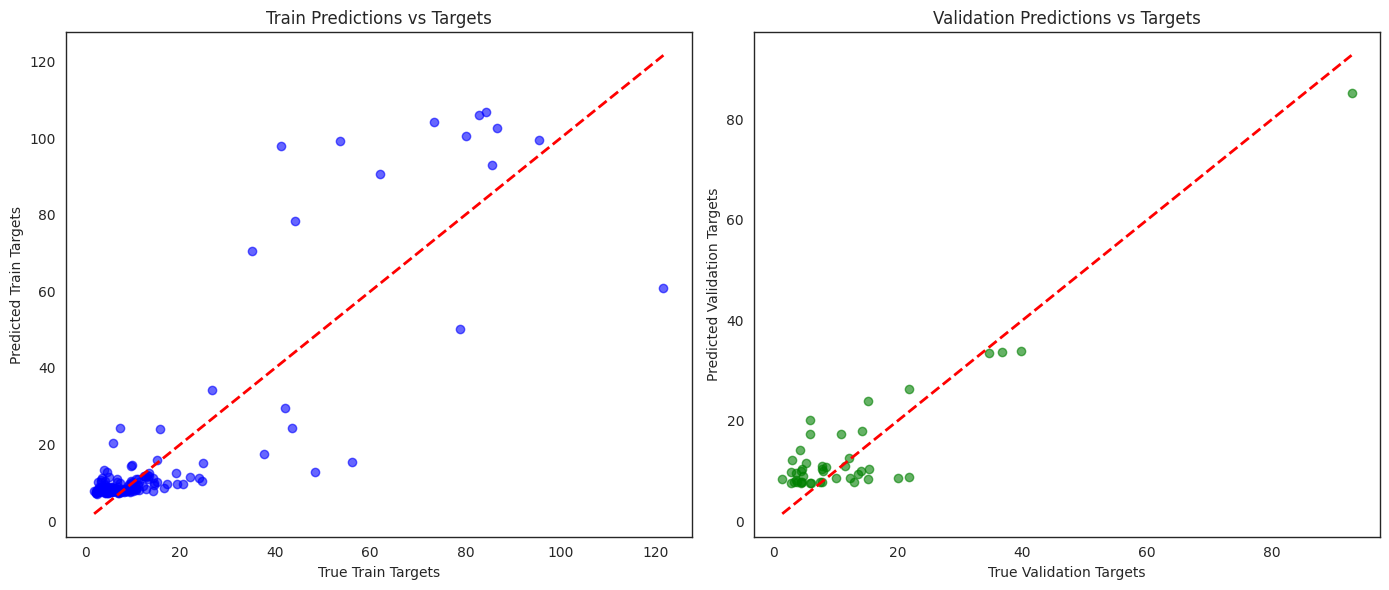

q_gpu=True raw_file_name='ALLFTD_dataset_for_nina_louisa_071124_age_adjusted.csv' gat_v4_fc_dim=[[64, 128, 128, 32], [128, 256, 256, 64], [256, 512, 512, 128]] devices=[0, 1, 2, 3, 4, 5, 6, 7] cpu_per_worker=1 act_choices=['relu', 'tanh', 'sigmoid', 'elu'] y_val='nfl' dropout_choices=[0.1, 0.2, 0.5] num_nodes_choices=[7258] checkpoint_dir='/scratch/lcornelis/outputs/checkpoints' num_samples=2000 output_dir='/scratch/lcornelis/outputs' dataset_name='ftd' project='proteo' use_master_nodes=False use_gpu=True sex_specific_adj_choices=[True, False] num_to_keep=2 gat_v4_weight_initializer=['xavier', 'kaiming', 'orthogonal', 'truncated_normal'] wandb_tmp_dir='/tmp' mutation_choices=[['GRN', 'MAPT', 'C9orf72', 'CTL']] gat_v4_fc_dropout=[0.1, 0.2, 0.5] gat_v4_fc_act=['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu'] sex_specific_adj=True sex_choices=[['M', 'F']] l1_lambda_max=0.1 act='sigmoid' gat_heads=[1, 2, 4, 8] lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealing

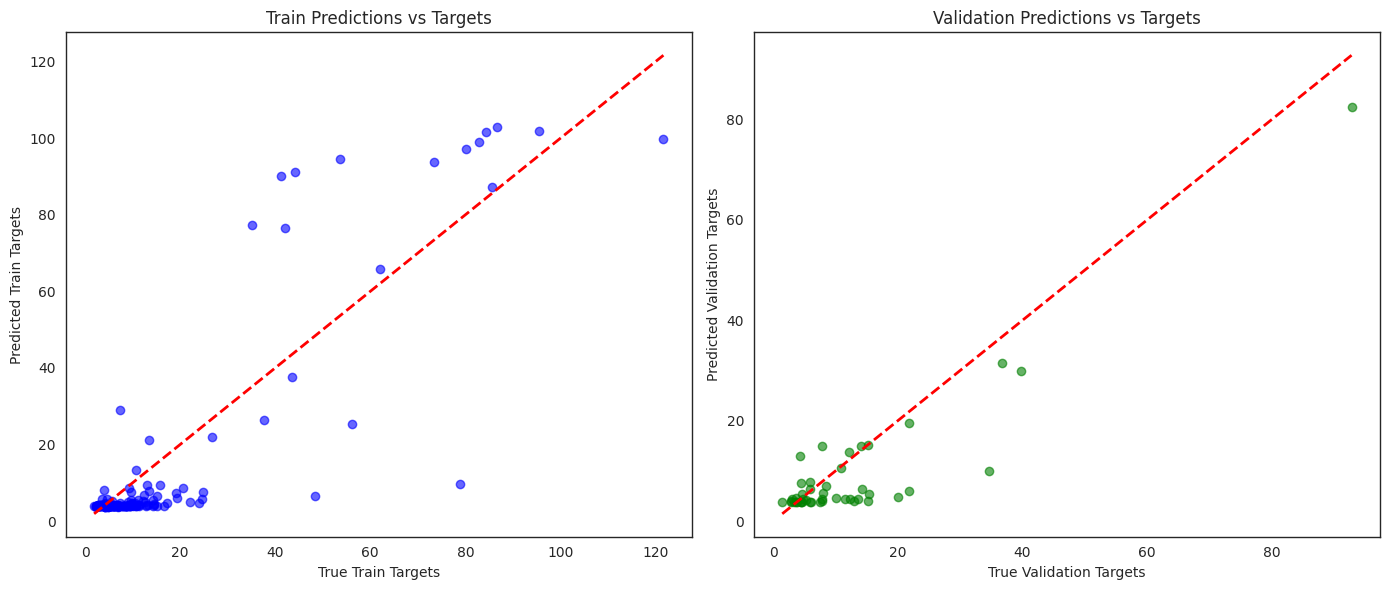

gat_v4_fc_act=['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu'] gat_num_layers=[2, 4, 6, 12] model_grid_search=['gat-v4'] use_gpu=True adj_thresh=0.9 lr=0.00036602507505241537 l1_lambda=3.2571440984377084e-05 dataset_name='ftd' precision='32-true' lr_scheduler='LambdaLR' gat={'num_layers': 2, 'hidden_channels': 256, 'heads': 4, 'v2': True} sync_batchnorm=False seed=49999 devices=[0, 1, 2, 3, 4, 5, 6, 7] lr_min=1e-06 modality='csf' batch_size=50 checkpoint_dir='/scratch/lcornelis/outputs/checkpoints' gat-v4={'hidden_channels': [32, 64], 'heads': [2, 2], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation'], 'fc_dim': [256, 512, 512, 128], 'fc_dropout': 0.1, 'fc_act': 'relu', 'weight_initializer': 'truncated_normal', 'num_layers': None, 'channel_list': None, 'norm': None, 'plain_last': None} mutation_choices=[['GRN', 'MAPT', 'C9orf72', 'CTL']] gat_v4_weight_initializer=['xavier', 'kaiming', 'orthogonal', 'truncated_normal'] act_choices=['relu', 'tanh', '

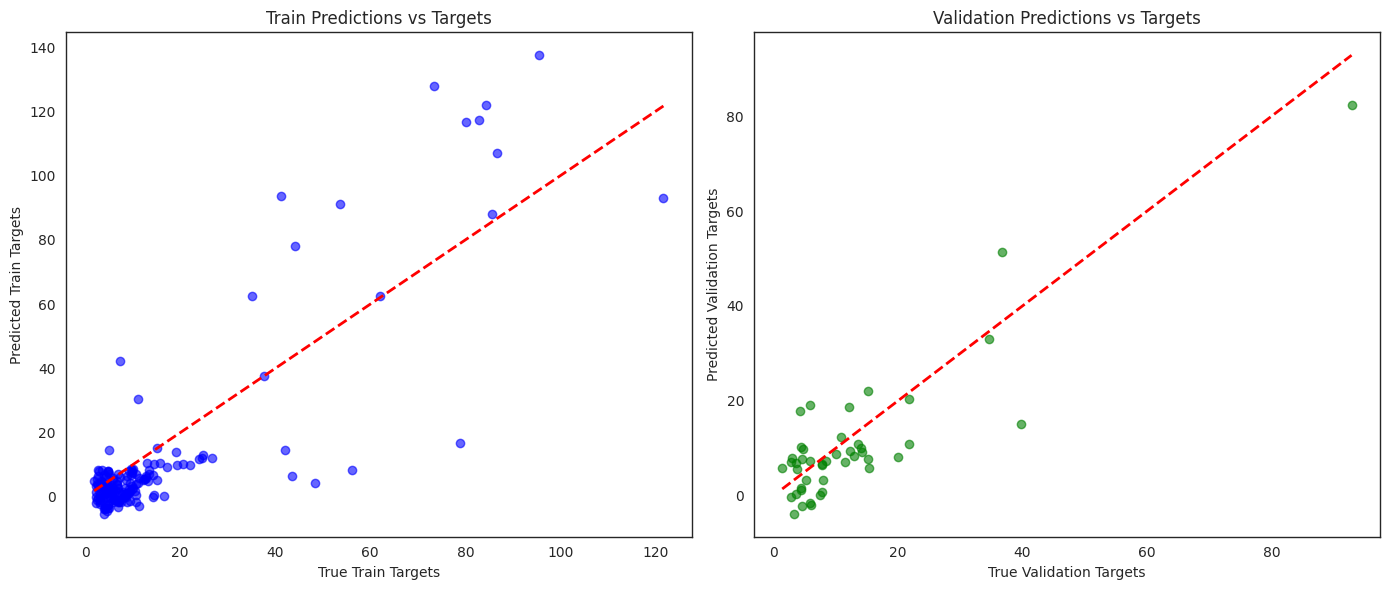

In [3]:
# Without Age:
# With Sex Specific Adj
model_1_no_age_sex = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-11-04_18-54-36/model=gat-v4,seed=53034_1574_act=relu,adj_thresh=0.9000,batch_size=50,dropout=0.2000,l1_lambda=0.0000,lr=0.0013,lr_scheduler=Cosin_2024-11-05_15-31-35/checkpoint_000064"
model_2_no_age_sex = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-11-04_18-54-36/model=gat-v4,seed=21407_2200_act=sigmoid,adj_thresh=0.9000,batch_size=16,dropout=0.1000,l1_lambda=0.0000,lr=0.0008,lr_scheduler=Co_2024-11-06_01-26-46/checkpoint_000237"
model_3_no_age_sex = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-11-04_18-54-36/model=gat-v4,seed=49999_368_act=elu,adj_thresh=0.9000,batch_size=50,dropout=0.5000,l1_lambda=0.0000,lr=0.0004,lr_scheduler=LambdaL_2024-11-04_21-53-23/checkpoint_000107"
outputs = full_load_and_run_and_convert(model_1_no_age_sex, device, csf_all_no_log_mean, csf_all_no_log_std)
outputs = full_load_and_run_and_convert(model_2_no_age_sex, device, csf_all_no_log_mean, csf_all_no_log_std)
outputs = full_load_and_run_and_convert(model_3_no_age_sex, device, csf_all_no_log_mean, csf_all_no_log_std)

trainer_accelerator='gpu' act='tanh' wandb_tmp_dir='/tmp' q_gpu=True optimizer='Adam' gcn={'num_layers': 3, 'hidden_channels': 32} gat_v4_fc_dropout=[0.1, 0.2, 0.5] pin_memory=True y_val='nfl' act_choices=['relu', 'tanh', 'sigmoid', 'elu'] gat_heads=[1, 2, 4, 8] mlp={'channel_list': [7261, 32, 64, 128, 1], 'norm': 'batch_norm', 'plain_last': True} wandb_api_key_path='wandb_api_key.txt' num_nodes=7258 ray_results_dir='/scratch/lcornelis/outputs/ray_results' output_dir='/scratch/lcornelis/outputs' epochs=1000 nodes_count=1 lr=0.00028621014505834317 accumulate_grad_batches=1 grace_period=30 l1_lambda_min=1e-05 precision='32-true' model_grid_search=['gat-v4'] root_dir='/home/lcornelis/code/proteo' log_every_n_steps=10 checkpoint_dir='/scratch/lcornelis/outputs/checkpoints' raw_file_name='ALLFTD_dataset_for_nina_louisa_071124_age_adjusted.csv' gat_v4_heads=[[2, 3], [2, 2], [4, 4]] modality='csf' devices=[0, 1, 2, 3, 4, 5, 6, 7] gat-v4={'hidden_channels': [8, 16], 'heads': [4, 4], 'use_layer

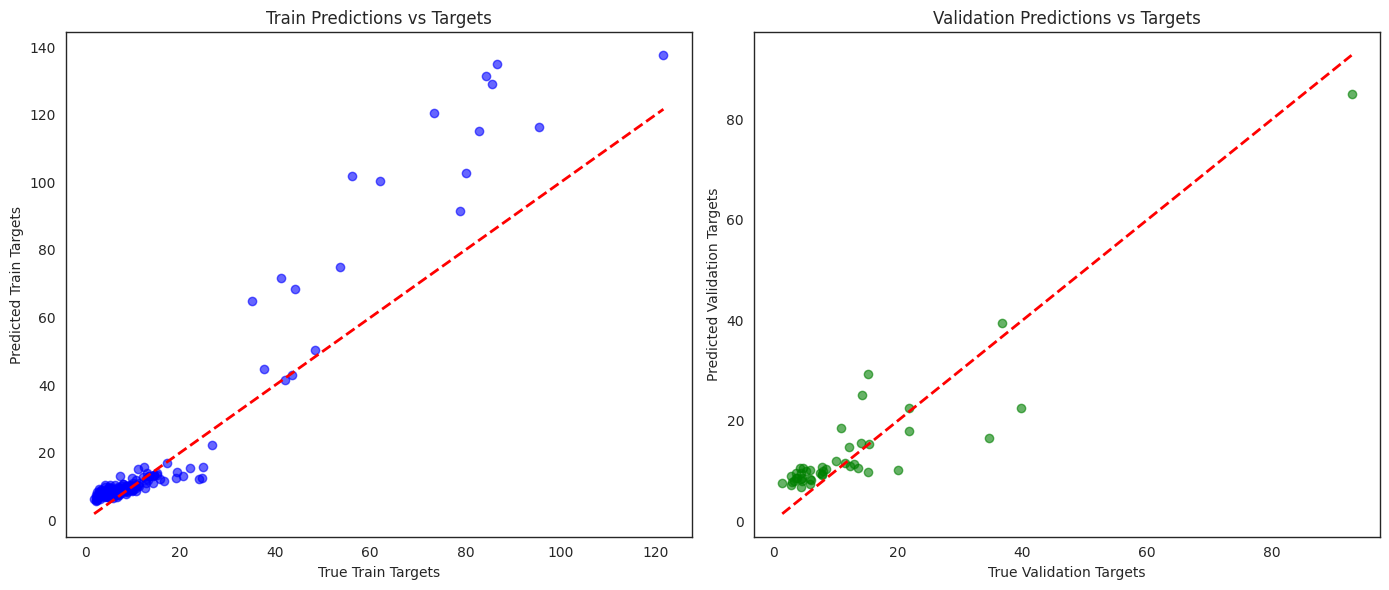

l1_lambda_min=1e-05 adj_thresh_choices=[0.2, 0.35, 0.5, 0.7, 0.9] gat_heads=[1, 2, 4, 8] batch_size_choices=[8, 16, 32, 50] weight_decay=0 ray_results_dir='/scratch/lcornelis/outputs/ray_results' act_choices=['relu', 'tanh', 'sigmoid', 'elu'] mutation_choices=[['GRN', 'MAPT', 'C9orf72', 'CTL']] q_gpu=True gat_num_layers=[2, 4, 6, 12] output_dir='/scratch/lcornelis/outputs' l1_lambda_max=0.1 l1_lambda=4.1308717106120854e-05 raw_file_name='ALLFTD_dataset_for_nina_louisa_071124_age_adjusted.csv' adj_thresh=0.9 seed=47436 reduction_factor=6 sync_batchnorm=False mlp_plain_last=[True, False] num_workers=16 gat_v4_which_layer_choices=[['layer1', 'layer2', 'layer3', 'sex', 'mutation', 'age'], ['layer1', 'layer2', 'layer3', 'sex', 'mutation']] num_to_keep=2 act='tanh' gat_v4_heads=[[2, 3], [2, 2], [4, 4]] gat_v4_fc_dropout=[0.1, 0.2, 0.5] gcn_num_layers=[2, 3, 4] modality='csf' sex=['M', 'F'] use_progress_bar=True lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealing

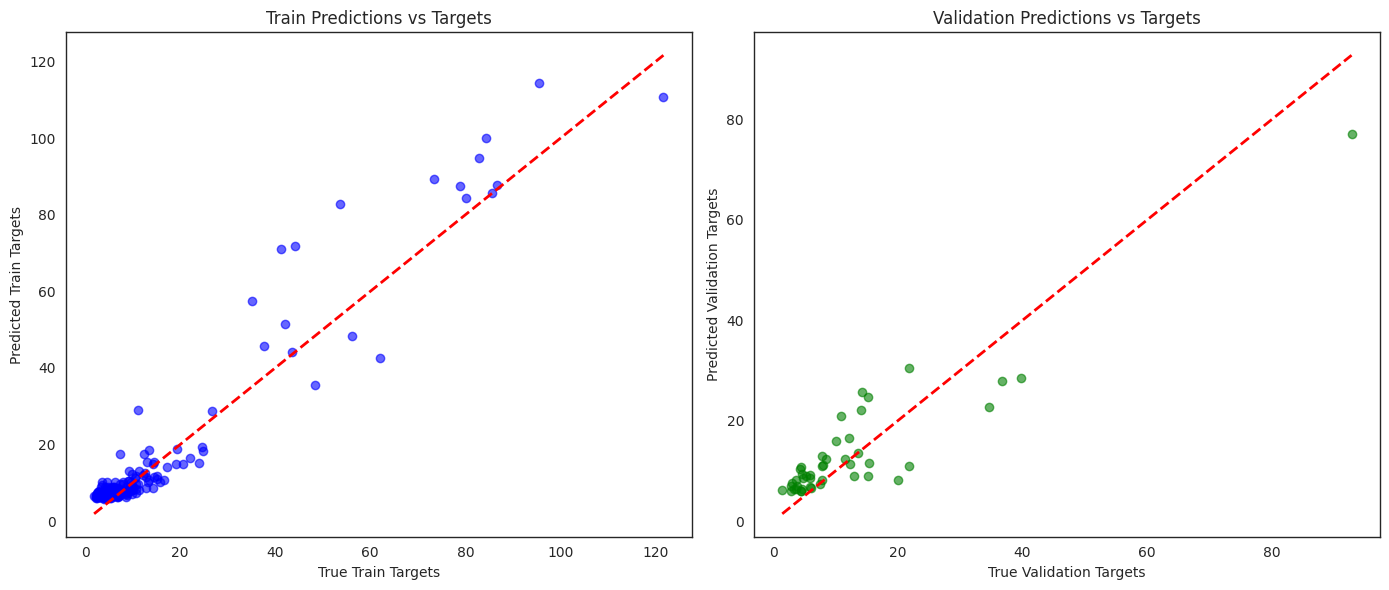

lr_max=0.1 lr_min=1e-06 mlp_channel_lists=[[7261, 1], [7261, 1028, 1], [7261, 128, 64, 1], [7261, 1028, 128, 1], [7261, 1028, 256, 64, 1], [7261, 1028, 512, 128, 1], [7261, 1028, 256, 128, 64, 1]] gcn_hidden_channels=[8, 32, 128] gat_hidden_channels=[8, 32, 128, 256] wgcna_mergeCutHeight=0.25 q_gpu=True y_val='nfl' nodes_count=1 accumulate_grad_batches=1 batch_size_choices=[8, 16, 32, 50] mlp_norms=['batch_norm', 'layer_norm'] num_nodes=7258 pin_memory=True mutation=['GRN', 'MAPT', 'C9orf72', 'CTL'] devices=[0, 1, 2, 3, 4, 5, 6, 7] epochs=1000 gat_heads=[1, 2, 4, 8] wgcna_minModuleSize=10 l1_lambda=3.503710154044107e-05 act_choices=['relu', 'tanh', 'sigmoid', 'elu'] data_dir='/scratch/lcornelis/data/data_louisa' gat_v4_fc_dim=[[64, 128, 128, 32], [128, 256, 256, 64], [256, 512, 512, 128]] lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR'] act='tanh' gat_v4_heads=[[2, 3], [2, 2], [4, 4]] gat-v4={'hidden_channels': [8, 16], 'heads': [2, 2], 'use_layer_n

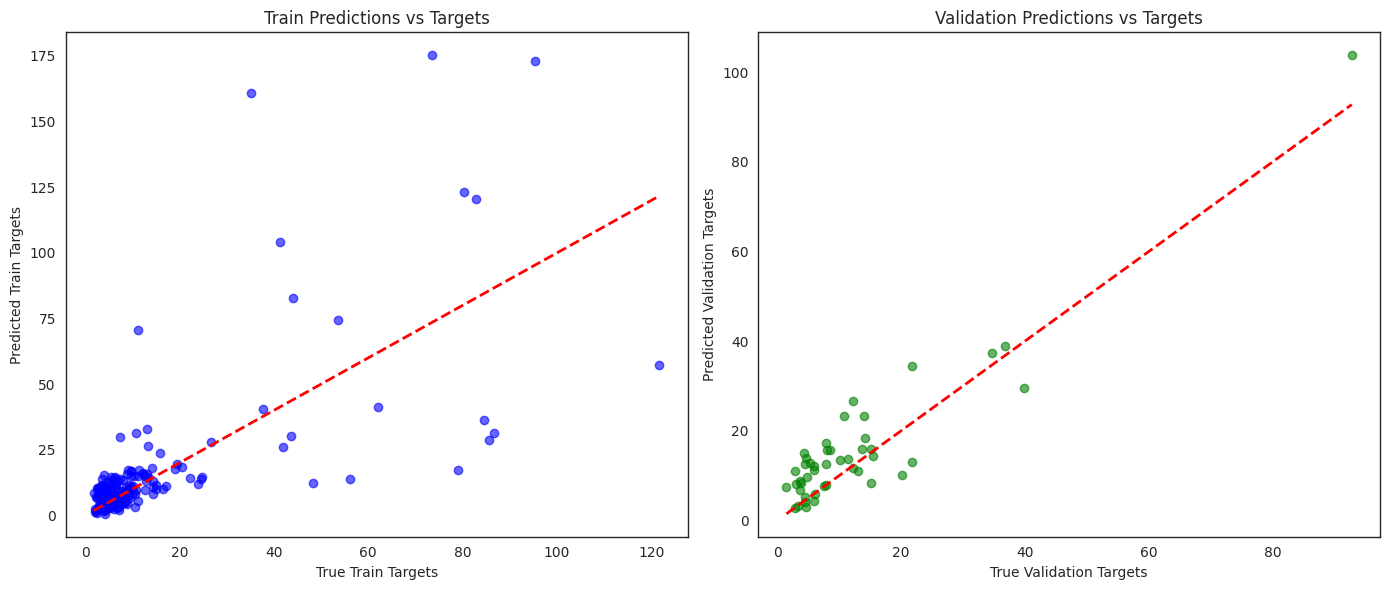

In [3]:
# With Age:
# Without Sex Specific Adj
model_1_age_no_sex = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-10-29_13-49-44/model=gat-v4,seed=17318_2961_act=tanh,adj_thresh=0.7000,batch_size=50,dropout=0.5000,l1_lambda=0.0000,lr=0.0003,lr_scheduler=Cosin_2024-10-31_07-35-38/checkpoint_000150"
model_2_age_no_sex = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-10-29_13-49-44/model=gat-v4,seed=47436_511_act=tanh,adj_thresh=0.9000,batch_size=8,dropout=0.1000,l1_lambda=0.0000,lr=0.0001,lr_scheduler=CosineA_2024-10-29_18-37-51/checkpoint_000342"
model_3_age_no_sex = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-10-29_13-49-44/model=gat-v4,seed=51601_1917_act=tanh,adj_thresh=0.2000,batch_size=8,dropout=0.1000,l1_lambda=0.0000,lr=0.0006,lr_scheduler=Reduce_2024-10-30_16-39-16/checkpoint_000010"
outputs = full_load_and_run_and_convert(model_1_age_no_sex, device, csf_all_no_log_mean, csf_all_no_log_std)
outputs = full_load_and_run_and_convert(model_2_age_no_sex, device, csf_all_no_log_mean, csf_all_no_log_std)
outputs = full_load_and_run_and_convert(model_3_age_no_sex, device, csf_all_no_log_mean, csf_all_no_log_std)

In [1]:
# With Age:
# With Sex Specific Adj
model_1_age_sex = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-10-29_13-49-44/model=gat-v4,seed=65438_2436_act=tanh,adj_thresh=0.7000,batch_size=16,dropout=0.5000,l1_lambda=0.0000,lr=0.0015,lr_scheduler=Lambd_2024-10-30_23-25-29/checkpoint_000069"
model_2_age_sex = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-10-29_13-49-44/model=gat-v4,seed=48858_968_act=relu,adj_thresh=0.3500,batch_size=50,dropout=0.5000,l1_lambda=0.0003,lr=0.0028,lr_scheduler=Cosine_2024-10-30_03-03-38/checkpoint_000109"
model_3_age_sex = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-10-29_13-49-44/model=gat-v4,seed=65003_3748_act=sigmoid,adj_thresh=0.9000,batch_size=16,dropout=0.5000,l1_lambda=0.0002,lr=0.0002,lr_scheduler=La_2024-10-31_19-24-12/checkpoint_000027"
outputs = full_load_and_run_and_convert(model_1_age_sex, device, csf_all_no_log_mean, csf_all_no_log_std)
outputs = full_load_and_run_and_convert(model_2_age_sex, device, csf_all_no_log_mean, csf_all_no_log_std)
outputs = full_load_and_run_and_convert(model_3_age_sex, device, csf_all_no_log_mean, csf_all_no_log_std)

NameError: name 'full_load_and_run_and_convert' is not defined

act='elu' gat_v4_hidden_channels=[[8, 16], [32, 64], [64, 128]] num_workers=16 error_protein_file_name='bimodal_aptamers_for_removal.xlsx' batch_size=50 gat_v4_fc_dropout=[0.1, 0.2, 0.5] gat_hidden_channels=[8, 32, 128, 256] epochs=1000 mlp_plain_last=[True, False] master_nodes=['sex', 'mutation', 'age'] output_dir='/scratch/lcornelis/outputs' num_nodes_choices=[7258] sync_batchnorm=False dropout_choices=[0.1, 0.2, 0.5] gat_v4_weight_initializer=['xavier', 'kaiming', 'orthogonal', 'truncated_normal'] num_samples=2000 project='proteo' wgcna_mergeCutHeight=0.25 adj_thresh_choices=[0.2, 0.35, 0.5, 0.7, 0.9] l1_lambda_max=0.1 precision='32-true' wandb_tmp_dir='/scratch/lcornelis/tmp' seed=26212 pin_memory=True wgcna_minModuleSize=10 raw_file_name='ALLFTD_dataset_for_nina_louisa_071124_age_adjusted.csv' root_dir='/home/lcornelis/code/proteo' gcn_hidden_channels=[8, 32, 128] act_choices=['relu', 'tanh', 'sigmoid', 'elu'] mutation_choices=[['GRN', 'MAPT', 'C9orf72', 'CTL']] use_progress_bar=T

torch.Size([50, 1])
torch.Size([1, 1])
Normalized Val MSE: tensor(0.2638, grad_fn=<MeanBackward0>)
Normalized Val MSE2: tensor(0.2638)
Normalized train MSE: 0.29195794463157654
Original Units Train MSE: tensor(3.7140)
Original Units Train RMSE: tensor(1.9272)
Original Units Val MSE: tensor(3.3559, grad_fn=<MseLossBackward0>)
Original Units Val RMSE: tensor(1.8319, grad_fn=<SqrtBackward0>)
Val Z scores: [-1.25321215e-02 -1.26232207e-02 -1.09607652e-02 -5.95603778e-04
 -1.23086134e-02 -1.19872717e-02  1.25809026e+00  6.48061261e-02
  4.32797700e-01 -7.71141425e-03  3.75499755e-01 -1.25515452e-02
  8.07757676e-03 -3.23184073e-01 -1.01382136e-02 -3.06578400e-03
 -9.97006427e-03 -1.03479314e+00  1.72315717e-01  9.87178013e-02
  1.17591560e+00  3.14868242e-02 -2.96396780e+00  4.78791334e-02
 -1.16281817e-02 -2.44634345e-01 -1.01242280e-02 -1.23507632e-02
 -1.16679311e-01  4.46770281e-01 -8.02770536e-03 -2.80403942e-01
 -1.27384709e-02 -1.19118402e-02 -6.77814428e-03  3.53933096e+00
 -1.18751

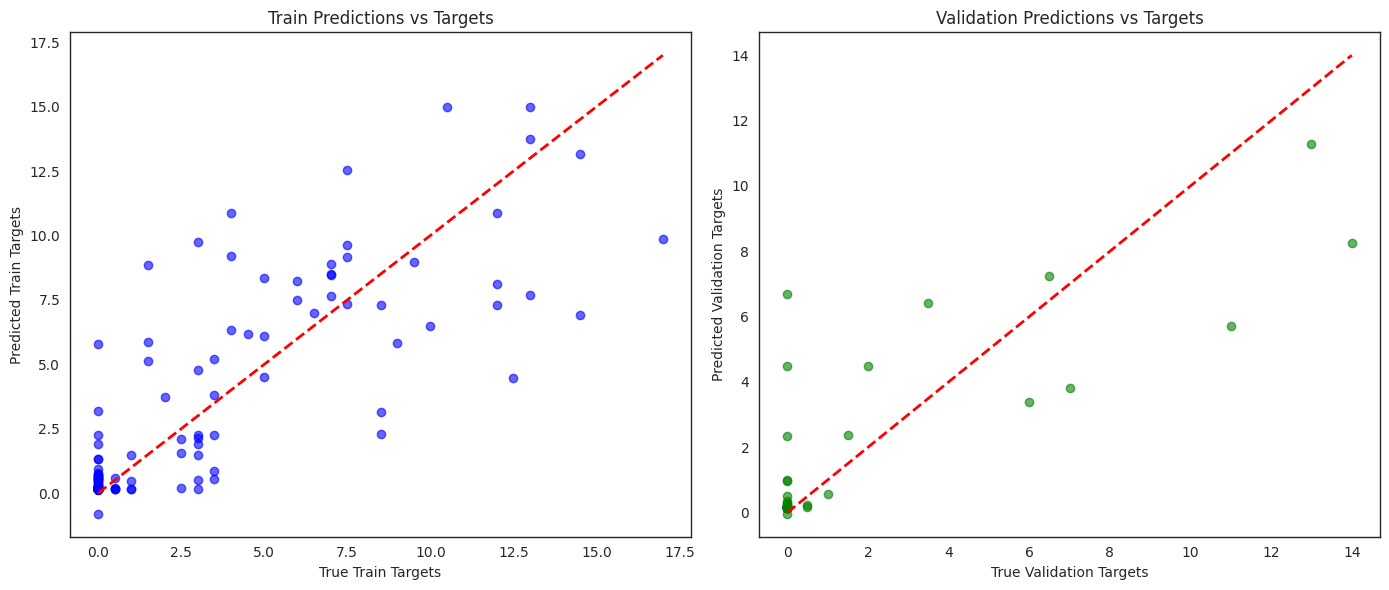

gcn={'num_layers': 3, 'hidden_channels': 32} dropout=0.5 l1_lambda=0.0015819476603248642 grace_period=30 y_val='clinical_dementia_rating' act='sigmoid' epochs=1000 gat_v4_fc_act=['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu'] root_dir='/home/lcornelis/code/proteo' ray_tmp_dir='/scratch/lcornelis/tmp' mutation=['GRN', 'MAPT', 'C9orf72', 'CTL'] batch_size=8 pin_memory=True data_dir='/scratch/lcornelis/data/data_louisa' num_samples=2000 dropout_choices=[0.1, 0.2, 0.5] gat_v4_fc_dropout=[0.1, 0.2, 0.5] sex_specific_adj_choices=[False] modality='csf' batch_size_choices=[8, 16, 32, 50] mlp_channel_lists=[[7261, 1], [7261, 1028, 1], [7261, 128, 64, 1], [7261, 1028, 128, 1], [7261, 1028, 256, 64, 1], [7261, 1028, 512, 128, 1], [7261, 1028, 256, 128, 64, 1]] num_to_keep=2 q_gpu=True accumulate_grad_batches=1 y_val_choices=['cog_z_score', 'clinical_dementia_rating'] gpu_per_worker=1 sex_specific_adj=False sex=['M', 'F'] gcn_hidden_channels=[8, 32, 128] modality_choices=['csf'] gat_v4_fc_dim=[[6

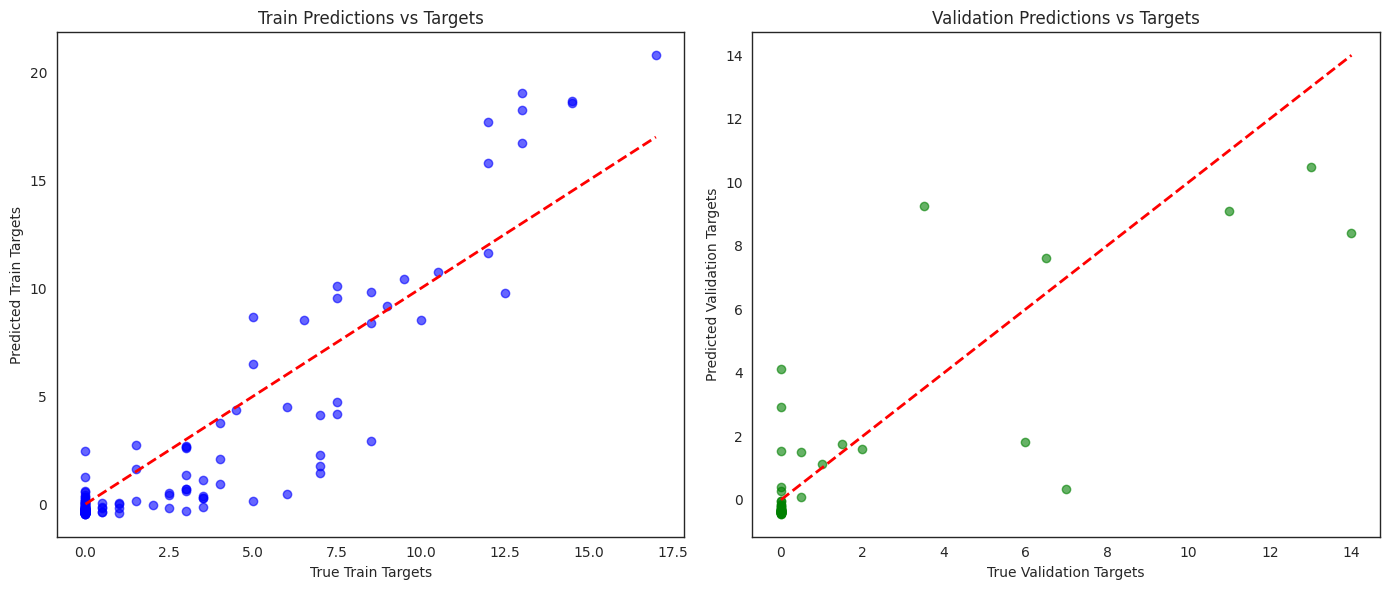

wgcna_minModuleSize=10 checkpoint_every_n_epochs_train=1 gat_v4_heads=[[2, 3], [2, 2], [4, 4]] mlp_channel_lists=[[7261, 1], [7261, 1028, 1], [7261, 128, 64, 1], [7261, 1028, 128, 1], [7261, 1028, 256, 64, 1], [7261, 1028, 512, 128, 1], [7261, 1028, 256, 128, 64, 1]] gat_v4_weight_initializer=['xavier', 'kaiming', 'orthogonal', 'truncated_normal'] gat-v4={'hidden_channels': [8, 16], 'heads': [4, 4], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation', 'age'], 'fc_dim': [64, 128, 128, 32], 'fc_dropout': 0.1, 'fc_act': 'tanh', 'weight_initializer': 'truncated_normal', 'num_layers': None, 'channel_list': None, 'norm': None, 'plain_last': None} num_to_keep=2 sex=['M', 'F'] use_gpu=True dropout=0.5 lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR'] grace_period=30 num_samples=2000 data_dir='/scratch/lcornelis/data/data_louisa' reduction_factor=6 epochs=1000 trainer_accelerator='gpu' lr_scheduler='LambdaLR' gat_num_layers

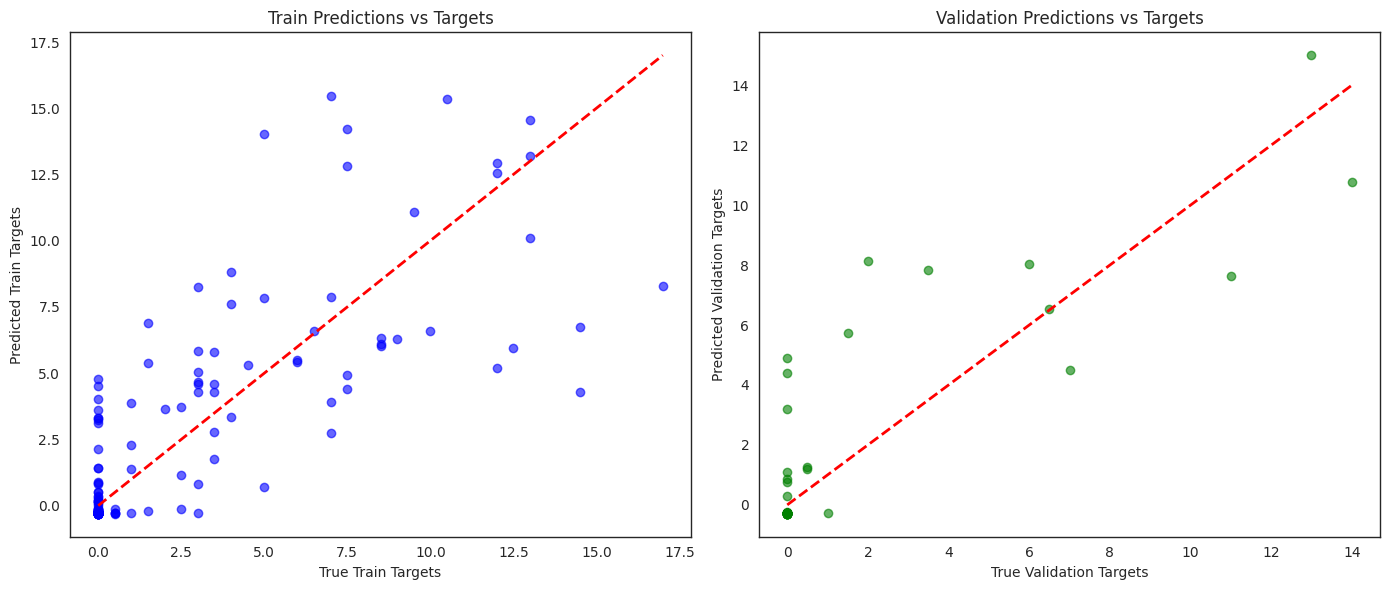

batch_size=8 l1_lambda_min=1e-05 master_nodes=['sex', 'mutation', 'age'] lr_max=0.1 sync_batchnorm=False root_dir='/home/lcornelis/code/proteo' grace_period=30 error_protein_file_name='bimodal_aptamers_for_removal.xlsx' num_workers=16 gpu_per_worker=1 lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR'] lr_min=1e-06 checkpoint_dir='/scratch/lcornelis/outputs/checkpoints' y_val='clinical_dementia_rating' sex_specific_adj=False dropout=0.1 model='gat-v4' modality_choices=['csf'] wandb_tmp_dir='/scratch/lcornelis/tmp' checkpoint_every_n_epochs_train=1 precision='32-true' q_gpu=True epochs=1000 y_val_choices=['cog_z_score', 'clinical_dementia_rating'] trainer_accelerator='gpu' pin_memory=True gat-v4={'hidden_channels': [64, 128], 'heads': [2, 3], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation', 'age'], 'fc_dim': [64, 128, 128, 32], 'fc_dropout': 0.1, 'fc_act': 'sigmoid', 'weight_initializer': 'truncated_normal', 'num_

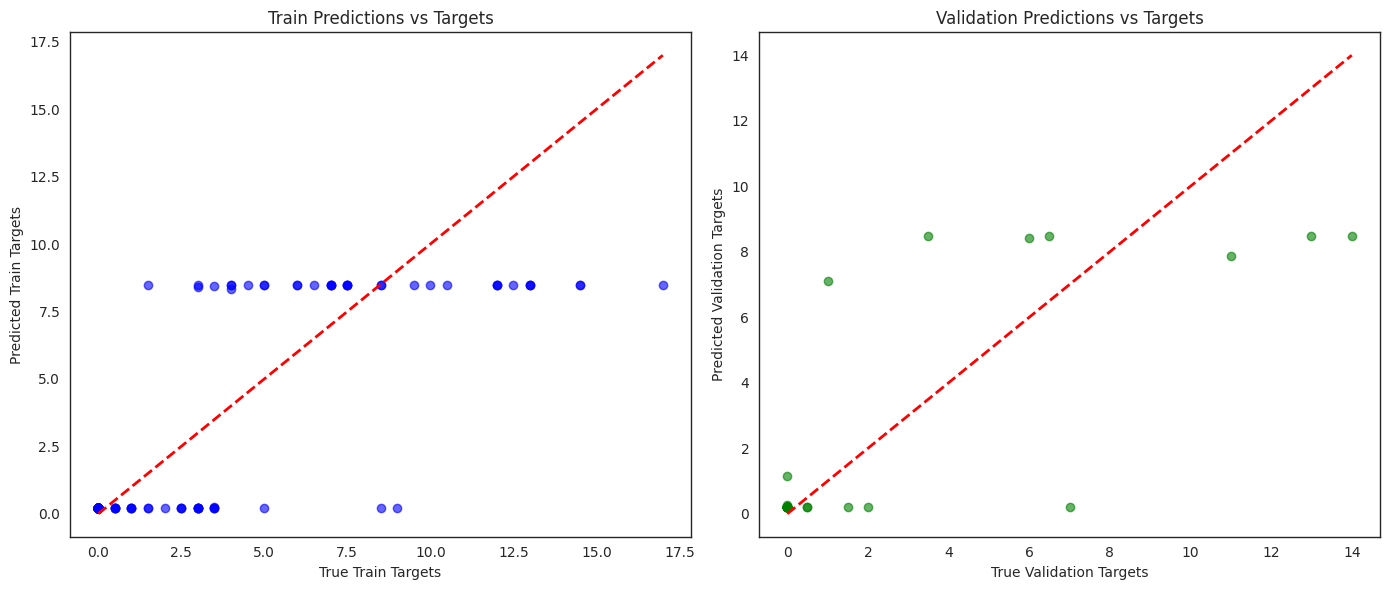

In [3]:
cdr_sb_all_mean = 1.812807881773399
cdr_sb_all_std = 3.5666674566521928
device = 'cpu'

cdr_model_1 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-11-19_17-30-10/model=gat-v4,seed=26212_2169_act=elu,adj_thresh=0.7000,batch_size=50,dropout=0.2000,l1_lambda=0.0000,lr=0.0112,lr_scheduler=Lambda_2024-11-20_21-13-10/checkpoint_000165"
cdr_model_2 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-11-19_17-30-10/model=gat-v4,seed=59322_2147_act=sigmoid,adj_thresh=0.3500,batch_size=8,dropout=0.5000,l1_lambda=0.0016,lr=0.0002,lr_scheduler=Cos_2024-11-20_21-04-43/checkpoint_000027"
cdr_model_3 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-11-19_17-30-10/model=gat-v4,seed=2044_3039_act=elu,adj_thresh=0.7000,batch_size=50,dropout=0.5000,l1_lambda=0.0000,lr=0.0061,lr_scheduler=LambdaL_2024-11-21_09-04-19/checkpoint_000168"
cdr_model_7 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-11-19_17-30-10/model=gat-v4,seed=54146_1741_act=sigmoid,adj_thresh=0.5000,batch_size=8,dropout=0.1000,l1_lambda=0.0000,lr=0.0012,lr_scheduler=Lam_2024-11-20_15-11-30/checkpoint_000179"
outputs = full_load_and_run_and_convert(cdr_model_1, device, cdr_sb_all_mean, cdr_sb_all_std)
outputs = full_load_and_run_and_convert(cdr_model_2, device, cdr_sb_all_mean, cdr_sb_all_std)
outputs = full_load_and_run_and_convert(cdr_model_3, device, cdr_sb_all_mean, cdr_sb_all_std)
outputs = full_load_and_run_and_convert(cdr_model_7, device, cdr_sb_all_mean, cdr_sb_all_std)


wgcna_minModuleSize=10 adj_thresh=0.9 gat_hidden_channels=[8, 32, 128, 256] num_to_keep=2 weight_decay=0 lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR'] nodes_count=1 grace_period=30 gpu_per_worker=1 epochs=1000 gat_v4_hidden_channels=[[8, 16], [32, 64], [64, 128]] checkpoint_dir='/scratch/lcornelis/outputs/checkpoints' adj_thresh_choices=[0.2, 0.35, 0.5, 0.7, 0.9] use_progress_bar=True mutation=['GRN', 'MAPT', 'C9orf72', 'CTL'] mlp_norms=['batch_norm', 'layer_norm'] gat_num_layers=[2, 4, 6, 12] gat-v4={'hidden_channels': [8, 16], 'heads': [2, 3], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation', 'age'], 'fc_dim': [64, 128, 128, 32], 'fc_dropout': 0.1, 'fc_act': 'sigmoid', 'weight_initializer': 'xavier', 'num_layers': None, 'channel_list': None, 'norm': None, 'plain_last': None} sex_specific_adj=False gcn_hidden_channels=[8, 32, 128] output_dir='/scratch/lcornelis/outputs' dataset_name='ftd' checkpoint_every_n

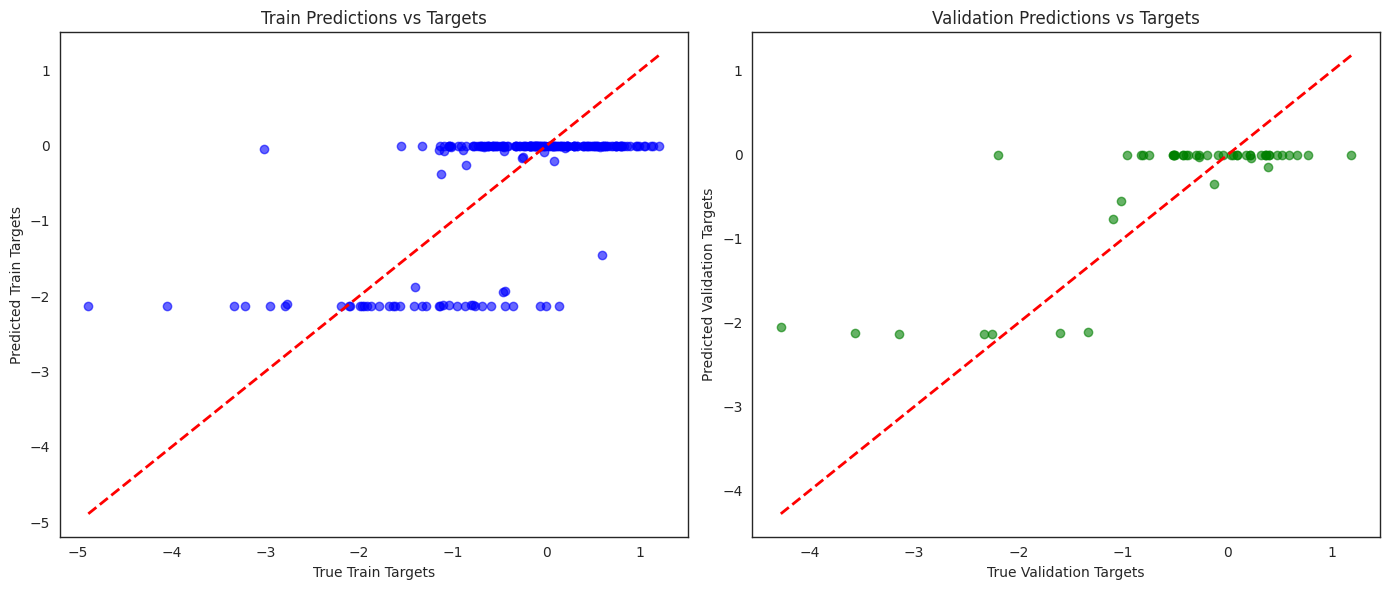

l1_lambda_min=1e-05 l1_lambda_max=0.1 lr_min=1e-06 gat_v4_hidden_channels=[[8, 16], [32, 64], [64, 128]] lr_max=0.1 wandb_tmp_dir='/scratch/lcornelis/tmp' model='gat-v4' wgcna_mergeCutHeight=0.25 gat_heads=[1, 2, 4, 8] epochs=1000 gat-v4={'hidden_channels': [64, 128], 'heads': [2, 2], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation', 'age'], 'fc_dim': [128, 256, 256, 64], 'fc_dropout': 0.1, 'fc_act': 'sigmoid', 'weight_initializer': 'truncated_normal', 'num_layers': None, 'channel_list': None, 'norm': None, 'plain_last': None} num_nodes=7258 mlp={'channel_list': [7261, 32, 64, 128, 1], 'norm': 'batch_norm', 'plain_last': True} log_every_n_steps=10 sex_choices=[['M', 'F']] modality_choices=['csf'] q_gpu=True num_nodes_choices=[7258] trainer_accelerator='gpu' wandb_api_key_path='wandb_api_key.txt' gat_hidden_channels=[8, 32, 128, 256] model_grid_search=['gat-v4'] ray_results_dir='/scratch/lcornelis/outputs/ray_results' sync_batchnorm=False num_to_ke

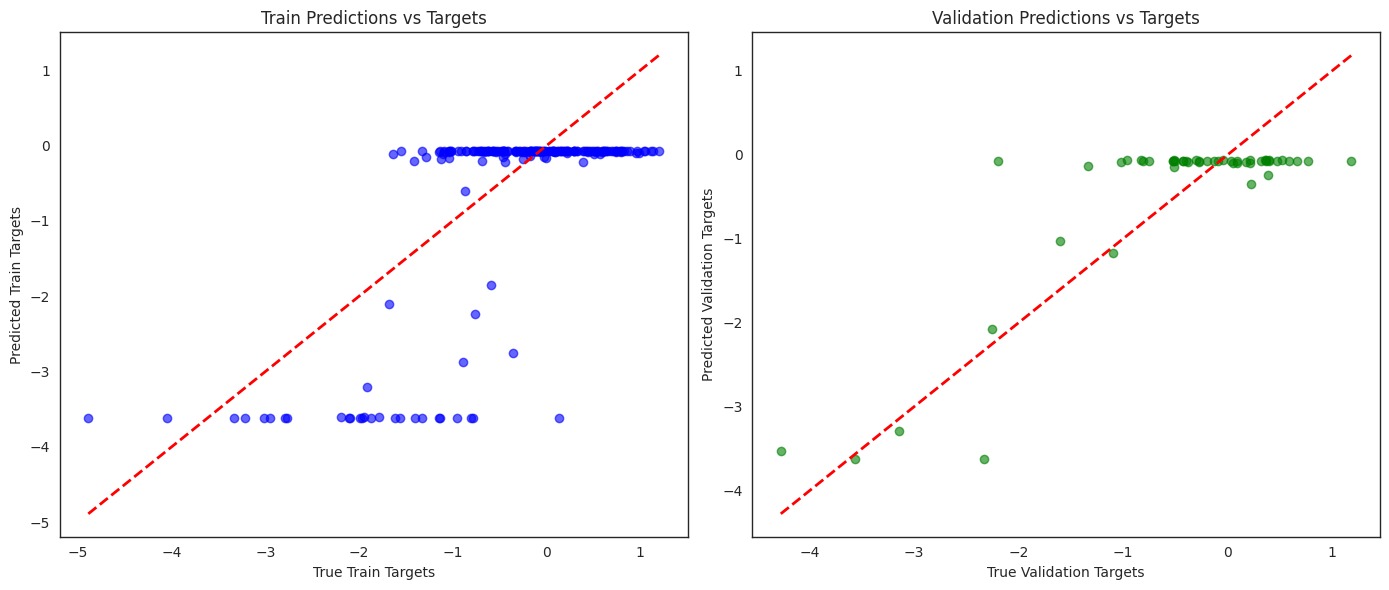

precision='32-true' epochs=1000 gcn_num_layers=[2, 3, 4] gpu_per_worker=1 error_protein_file_name='bimodal_aptamers_for_removal.xlsx' mlp_channel_lists=[[7261, 1], [7261, 1028, 1], [7261, 128, 64, 1], [7261, 1028, 128, 1], [7261, 1028, 256, 64, 1], [7261, 1028, 512, 128, 1], [7261, 1028, 256, 128, 64, 1]] mlp_norms=['batch_norm', 'layer_norm'] gat={'num_layers': 2, 'hidden_channels': 256, 'heads': 4, 'v2': True} root_dir='/home/lcornelis/code/proteo' accumulate_grad_batches=1 mutation_choices=[['GRN', 'MAPT', 'C9orf72', 'CTL']] y_val='cog_z_score' gcn={'num_layers': 3, 'hidden_channels': 32} devices=[0, 1, 2, 3, 4, 5, 6, 7] grace_period=30 wandb_tmp_dir='/scratch/lcornelis/tmp' dropout_choices=[0.1, 0.2, 0.5] sex_specific_adj_choices=[False] gcn_hidden_channels=[8, 32, 128] l1_lambda=1.0772166900840543e-05 modality='csf' use_progress_bar=True lr_min=1e-06 ray_results_dir='/scratch/lcornelis/outputs/ray_results' seed=51232 data_dir='/scratch/lcornelis/data/data_louisa' use_master_nodes=

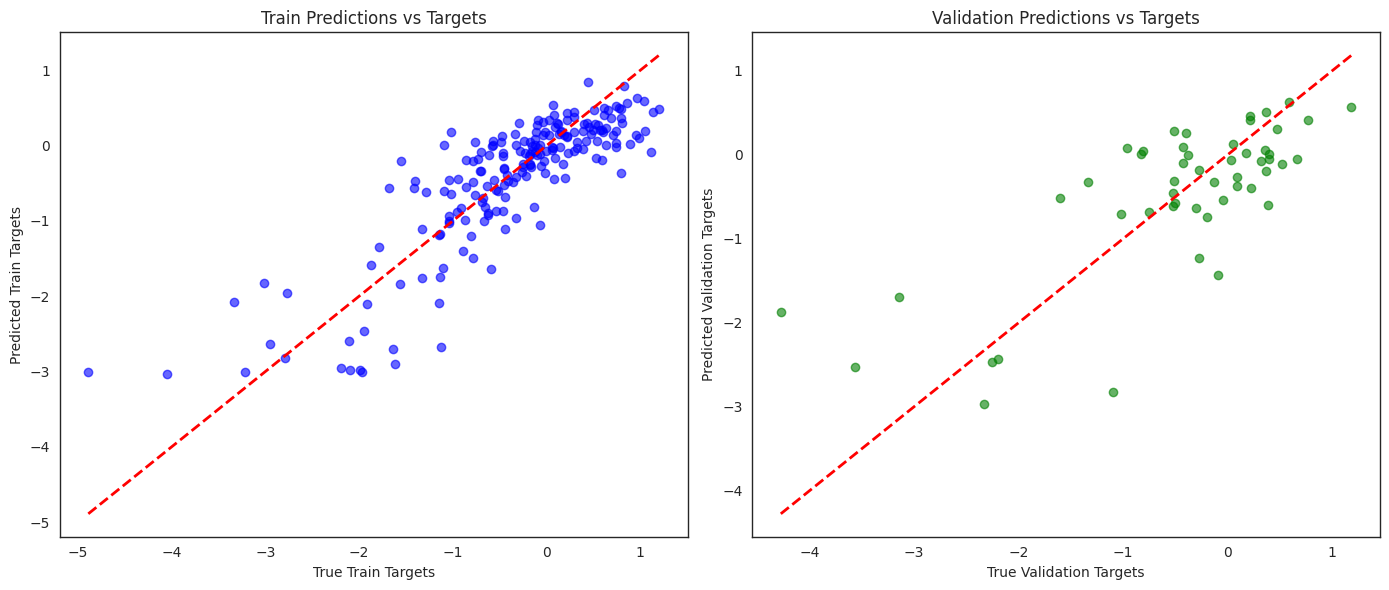

seed=29677 checkpoint_every_n_epochs_train=1 gcn_num_layers=[2, 3, 4] l1_lambda_max=0.1 num_samples=2000 lr_min=1e-06 data_dir='/scratch/lcornelis/data/data_louisa' sex=['M', 'F'] master_nodes=['sex', 'mutation', 'age'] gat-v4={'hidden_channels': [8, 16], 'heads': [4, 4], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation', 'age'], 'fc_dim': [128, 256, 256, 64], 'fc_dropout': 0.5, 'fc_act': 'sigmoid', 'weight_initializer': 'kaiming', 'num_layers': None, 'channel_list': None, 'norm': None, 'plain_last': None} accumulate_grad_batches=1 output_dir='/scratch/lcornelis/outputs' reduction_factor=6 y_val='cog_z_score' wandb_api_key_path='wandb_api_key.txt' dataset_name='ftd' log_every_n_steps=10 mlp={'channel_list': [7261, 32, 64, 128, 1], 'norm': 'batch_norm', 'plain_last': True} use_gpu=True gat_v4_heads=[[2, 3], [2, 2], [4, 4]] gat_v4_fc_dropout=[0.1, 0.2, 0.5] root_dir='/home/lcornelis/code/proteo' batch_size=32 sex_specific_adj_choices=[True, False] ml

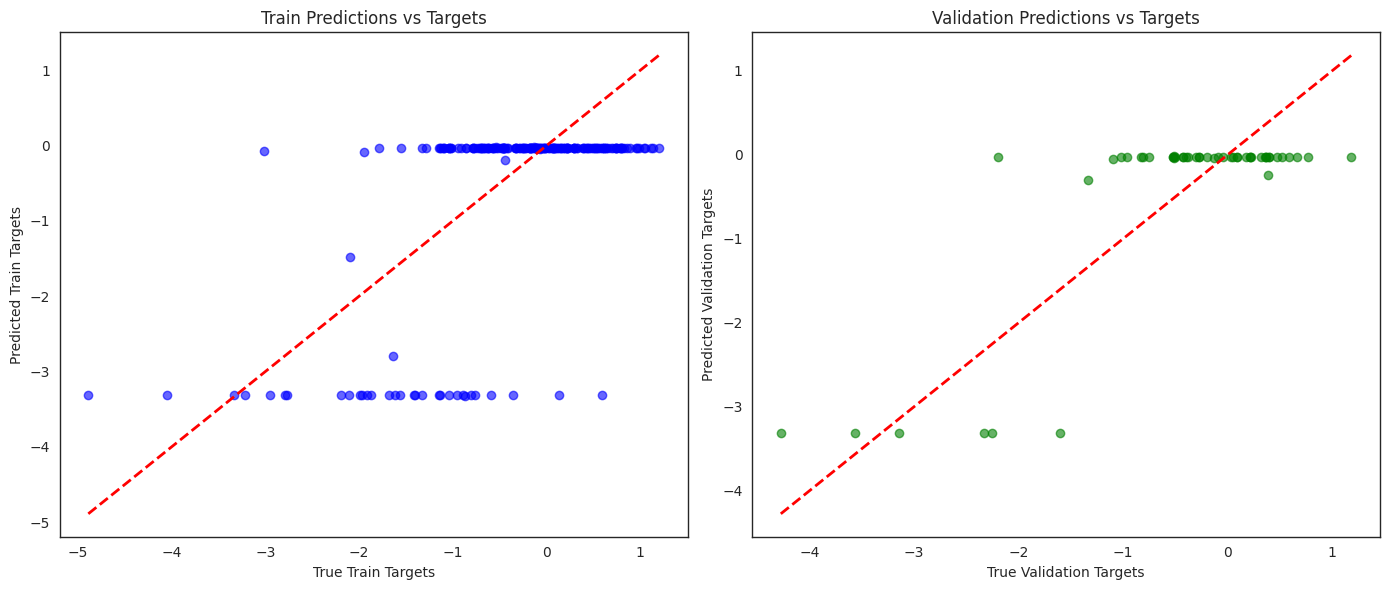

NameError: name 'cog_z_all_mean' is not defined

In [2]:
device = 'cpu' #'cuda' if torch.cuda.is_available() else 'cpu'
cog_z_all_mean_42_split = -0.41059763104455455
cog_z_all_std_42_split = 0.9939248987458366
cog_z_all_mean_30_split = -0.4097927562089553
cog_z_all_std_30_split = 0.9941697134348901

cogz_12_18_best = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-12-15_21-47-32/model=gat-v4,seed=52147_1410_act=relu,adj_thresh=0.9000,batch_size=50,dropout=0.5000,l1_lambda=0.0001,lr=0.0261,lr_scheduler=Cosin_2024-12-16_14-18-50/checkpoint_000023"
cogz_12_18_2 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-12-15_21-47-32/model=gat-v4,seed=51232_3005_act=relu,adj_thresh=0.7000,batch_size=50,dropout=0.5000,l1_lambda=0.0000,lr=0.0006,lr_scheduler=Lambd_2024-12-17_14-19-23/checkpoint_000160"
cog_z_12_12_best = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-12-09_16-47-36/model=gat-v4,seed=55464_1415_act=relu,adj_thresh=0.3500,batch_size=8,dropout=0.1000,l1_lambda=0.0004,lr=0.0064,lr_scheduler=Cosine_2024-12-10_11-51-26/checkpoint_000310"
cog_z_12_12_2 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-12-09_16-47-36/model=gat-v4,seed=29677_2660_act=tanh,adj_thresh=0.7000,batch_size=32,dropout=0.1000,l1_lambda=0.0001,lr=0.0256,lr_scheduler=Lambd_2024-12-11_04-25-59/checkpoint_000075"
cog_z_model_1 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-11-19_17-30-10/model=gat-v4,seed=62026_1490_act=elu,adj_thresh=0.7000,batch_size=8,dropout=0.2000,l1_lambda=0.0004,lr=0.0001,lr_scheduler=CosineA_2024-11-20_11-06-37/checkpoint_000102"
cog_z_model_2 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-11-19_17-30-10/model=gat-v4,seed=48777_3886_act=sigmoid,adj_thresh=0.7000,batch_size=8,dropout=0.2000,l1_lambda=0.0015,lr=0.0001,lr_scheduler=Cos_2024-11-21_23-31-41/checkpoint_000226"
cog_z_model_3 ="/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-11-19_17-30-10/model=gat-v4,seed=25221_1080_act=sigmoid,adj_thresh=0.5000,batch_size=8,dropout=0.5000,l1_lambda=0.0004,lr=0.0000,lr_scheduler=Cos_2024-11-20_03-56-26/checkpoint_000123"

outputs = full_load_and_run_and_convert(cogz_12_18_best, device, cog_z_all_mean_30_split, cog_z_all_std_30_split)

outputs = full_load_and_run_and_convert(cog_z_12_12_best, device, cog_z_all_mean_30_split, cog_z_all_std_30_split)
outputs = full_load_and_run_and_convert(cogz_12_18_2, device, cog_z_all_mean_30_split, cog_z_all_std_30_split)
outputs = full_load_and_run_and_convert(cog_z_12_12_2, device, cog_z_all_mean_30_split, cog_z_all_std_30_split )
outputs = full_load_and_run_and_convert(cog_z_model_1, device, cog_z_all_mean, cog_z_all_std)
outputs = full_load_and_run_and_convert(cog_z_model_2, device, cog_z_all_mean, cog_z_all_std)
outputs = full_load_and_run_and_convert(cog_z_model_3, device, cog_z_all_mean, cog_z_all_std)

checkpoint_dir='/scratch/lcornelis/outputs/checkpoints' mlp_norms=['batch_norm', 'layer_norm'] model='gat-v4' gpu_per_worker=1 mlp_channel_lists=[[7261, 1], [7261, 1028, 1], [7261, 128, 64, 1], [7261, 1028, 128, 1], [7261, 1028, 256, 64, 1], [7261, 1028, 512, 128, 1], [7261, 1028, 256, 128, 64, 1]] output_dir='/scratch/lcornelis/outputs' l1_lambda_max=0.1 lr=0.008696543866364927 gat_heads=[1, 2, 4, 8] optimizer='Adam' reduction_factor=6 ray_results_dir='/scratch/lcornelis/outputs/ray_results' root_dir='/home/lcornelis/code/proteo' num_to_keep=2 log_every_n_steps=10 wandb_tmp_dir='/scratch/lcornelis/tmp' wandb_api_key_path='wandb_api_key.txt' seed=42423 raw_file_name='ALLFTD_dataset_for_nina_louisa_071124_age_adjusted.csv' gat-v4={'hidden_channels': [32, 64], 'heads': [4, 4], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation', 'age'], 'fc_dim': [128, 256, 256, 64], 'fc_dropout': 0.1, 'fc_act': 'tanh', 'weight_initializer': 'orthogonal', 'num_layers':

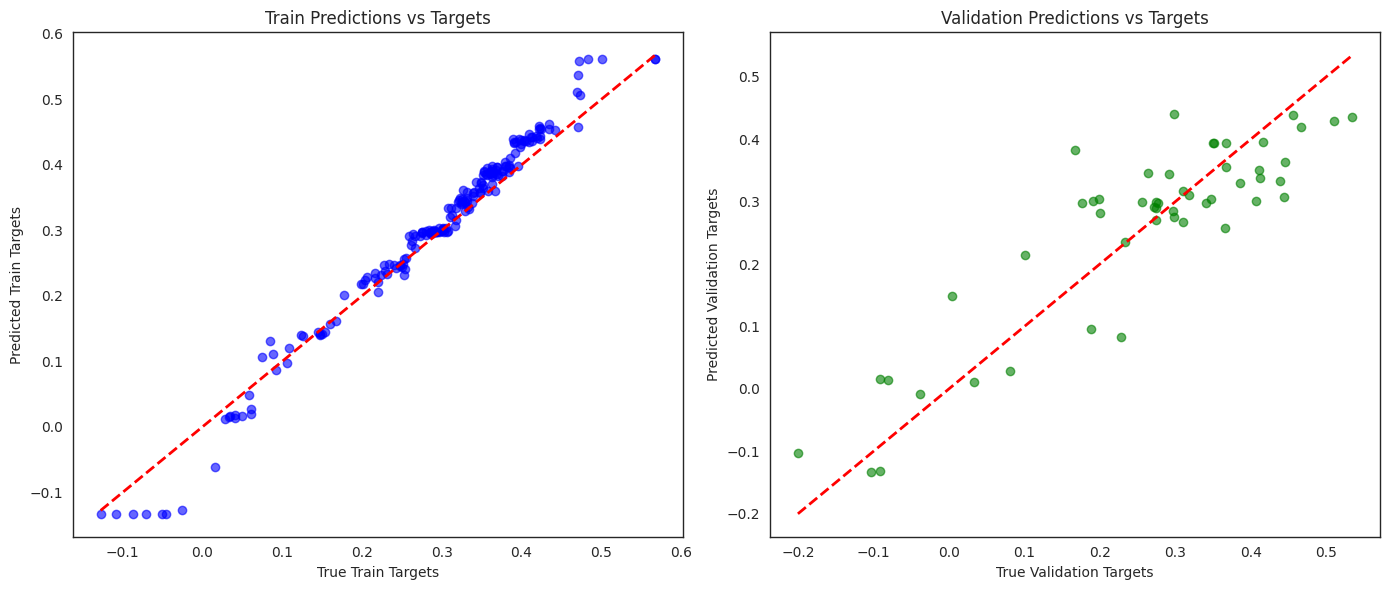

seed=1205 model='gat-v4' use_progress_bar=True output_dir='/scratch/lcornelis/outputs' wgcna_mergeCutHeight=0.25 epochs=1000 checkpoint_dir='/scratch/lcornelis/outputs/checkpoints' sex_specific_adj=False optimizer='Adam' precision='32-true' num_nodes_choices=[7257] lr_scheduler='LambdaLR' use_gpu=True num_samples=4000 use_weights=False dropout_choices=[0.1, 0.2, 0.5] log_every_n_steps=10 wgcna_minModuleSize=10 modality_choices=['csf'] gat_v4_heads=[[2, 3], [2, 2], [4, 4]] batch_size=8 lr_max=0.1 accumulate_grad_batches=1 y_val='global_cog_slope' ray_results_dir='/scratch/lcornelis/outputs/ray_results' random_state=42 data_dir='/scratch/lcornelis/data/data_louisa' gcn_hidden_channels=[8, 32, 128] dropout=0.5 l1_lambda=8.71451346300821e-05 model_grid_search=['gat-v4'] lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR'] sex=['M', 'F'] gat_v4_hidden_channels=[[8, 16], [32, 64], [64, 128]] gat_hidden_channels=[8, 32, 128, 256] gpu_per_worker=1 wandb_tmp_dir

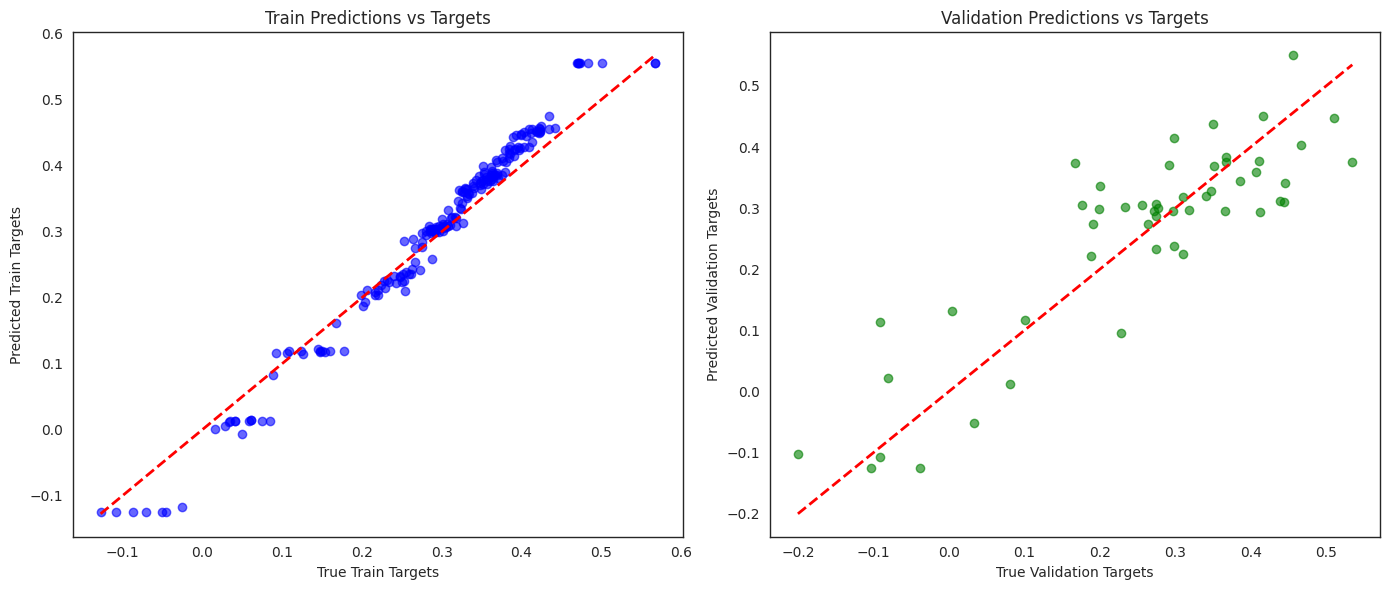

sync_batchnorm=False num_nodes=7257 gat_v4_weight_initializer=['xavier', 'kaiming', 'orthogonal', 'truncated_normal'] mutation_choices=[['GRN', 'MAPT', 'C9orf72', 'CTL']] sex_specific_adj_choices=[False] modality_choices=['csf'] gpu_per_worker=1 l1_lambda=3.323364326236304e-05 mlp_channel_lists=[[7261, 1], [7261, 1028, 1], [7261, 128, 64, 1], [7261, 1028, 128, 1], [7261, 1028, 256, 64, 1], [7261, 1028, 512, 128, 1], [7261, 1028, 256, 128, 64, 1]] mlp_plain_last=[True, False] adj_thresh=0.9 wandb_offline=False dropout=0.5 precision='32-true' use_weights=False seed=11858 gat_hidden_channels=[8, 32, 128, 256] use_progress_bar=True mlp={'channel_list': [7261, 32, 64, 128, 1], 'norm': 'batch_norm', 'plain_last': True} dataset_name='ftd' mlp_norms=['batch_norm', 'layer_norm'] epochs=1000 master_nodes=['sex', 'mutation', 'age'] wgcna_minModuleSize=10 model_grid_search=['gat-v4'] ray_tmp_dir='/scratch/lcornelis/tmp' gcn_num_layers=[2, 3, 4] gcn={'num_layers': 3, 'hidden_channels': 32} root_dir

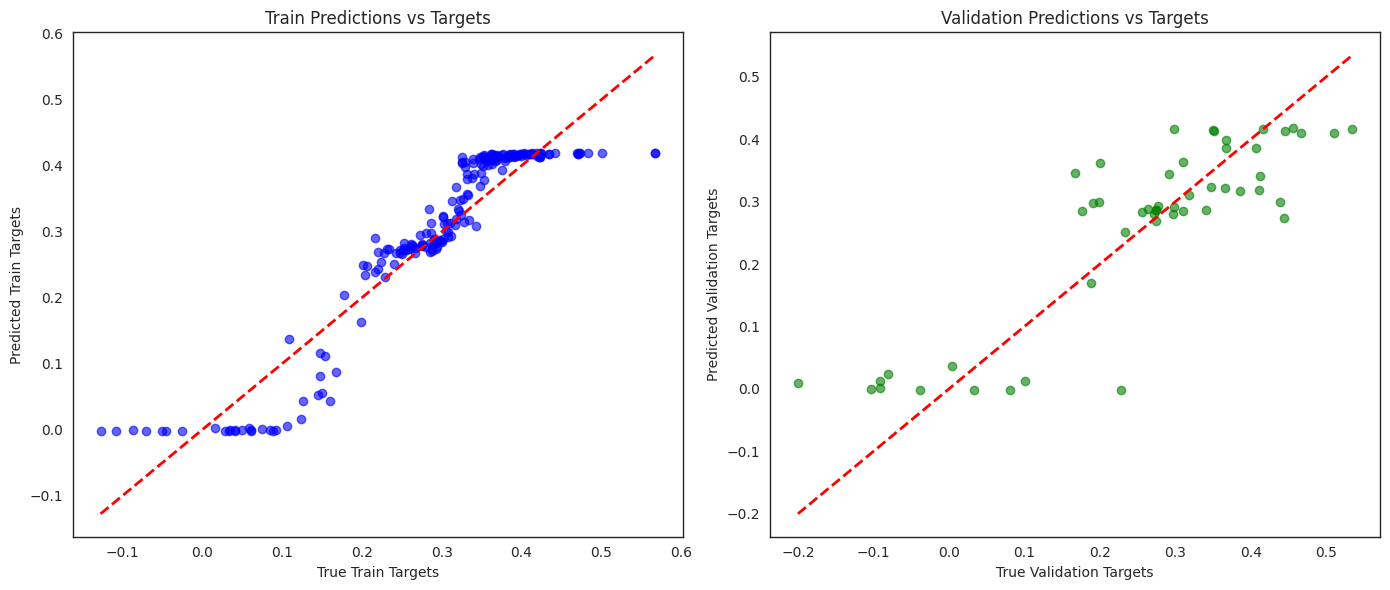

In [5]:
device = 'cpu'
global_cog_mean_42 = 0.28378350117326734
global_cog_std_42 = 0.13349438834419888

model_1_global_cog_2_5 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-02-03_16-34-34/model=gat-v4,seed=42423_3995_act=sigmoid,adj_thresh=0.7000,batch_size=32,dropout=0.2000,l1_lambda=0.0000,lr=0.0087,lr_scheduler=La_2025-02-05_12-48-31/checkpoint_000631"
model_2_global_cog_2_5 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-02-03_16-34-34/model=gat-v4,seed=1205_3328_act=elu,adj_thresh=0.2000,batch_size=8,dropout=0.5000,l1_lambda=0.0001,lr=0.0027,lr_scheduler=LambdaLR_2025-02-05_05-10-54/checkpoint_000405"
model_3_global_cog_2_5 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-02-03_16-34-34/model=gat-v4,seed=11858_950_act=relu,adj_thresh=0.9000,batch_size=16,dropout=0.5000,l1_lambda=0.0000,lr=0.0006,lr_scheduler=Cosine_2025-02-04_02-30-05/checkpoint_000435"

outputs = full_load_and_run_and_convert(model_1_global_cog_2_5, device, global_cog_mean_42, global_cog_std_42)
outputs = full_load_and_run_and_convert(model_2_global_cog_2_5, device, global_cog_mean_42, global_cog_std_42)
outputs = full_load_and_run_and_convert(model_3_global_cog_2_5, device, global_cog_mean_42, global_cog_std_42)


pin_memory=True sex_specific_adj_choices=[False] wandb_tmp_dir='/scratch/lcornelis/tmp' num_to_keep=2 use_weights=False num_workers=16 ray_tmp_dir='/scratch/lcornelis/tmp' wgcna_minModuleSize=10 batch_size_choices=[8, 16, 32, 50] gat_v4_fc_dropout=[0.1, 0.2, 0.5] precision='32-true' grace_period=30 lr_min=1e-06 num_samples=3000 sex_choices=[['M', 'F']] gat-v4={'hidden_channels': [8, 16], 'heads': [2, 3], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation', 'age'], 'fc_dim': [128, 256, 256, 64], 'fc_dropout': 0.1, 'fc_act': 'sigmoid', 'weight_initializer': 'truncated_normal', 'num_layers': None, 'channel_list': None, 'norm': None, 'plain_last': None} l1_lambda_min=1e-05 random_state=42 trainer_accelerator='gpu' model_grid_search=['gat-v4'] checkpoint_dir='/scratch/lcornelis/outputs/checkpoints' act='elu' l1_lambda_max=0.1 devices=[0, 1, 2, 3, 4, 5, 6, 7] wandb_api_key_path='wandb_api_key.txt' model='gat-v4' seed=18032 reduction_factor=6 gcn_num_layers

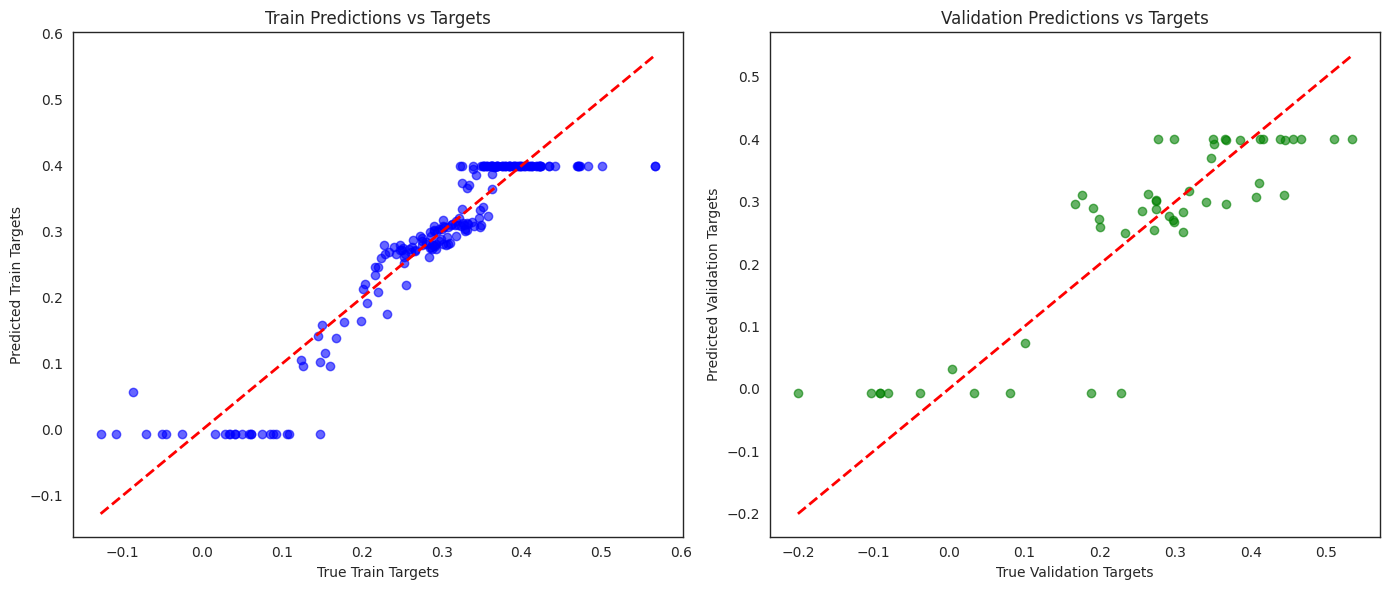

sex=['M', 'F'] model='gat-v4' dataset_name='ftd' mutation_choices=[['GRN', 'MAPT', 'C9orf72', 'CTL']] master_nodes=['sex', 'mutation', 'age'] act_choices=['relu', 'tanh', 'sigmoid', 'elu'] data_dir='/scratch/lcornelis/data/data_louisa' epochs=1000 gat_heads=[1, 2, 4, 8] num_to_keep=2 gcn={'num_layers': 3, 'hidden_channels': 32} nodes_count=1 num_nodes_choices=[7258] l1_lambda_min=1e-05 ray_tmp_dir='/scratch/lcornelis/tmp' lr_max=0.1 modality='csf' accumulate_grad_batches=1 sex_choices=[['M', 'F']] use_progress_bar=True wgcna_minModuleSize=10 raw_file_name='ALLFTD_dataset_for_nina_louisa_071124_age_adjusted.csv' lr_scheduler='LambdaLR' reduction_factor=6 dropout=0.1 modality_choices=['csf'] use_gpu=True wandb_api_key_path='wandb_api_key.txt' gat-v4={'hidden_channels': [32, 64], 'heads': [4, 4], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation', 'age'], 'fc_dim': [256, 512, 512, 128], 'fc_dropout': 0.1, 'fc_act': 'tanh', 'weight_initializer': 'kaimin

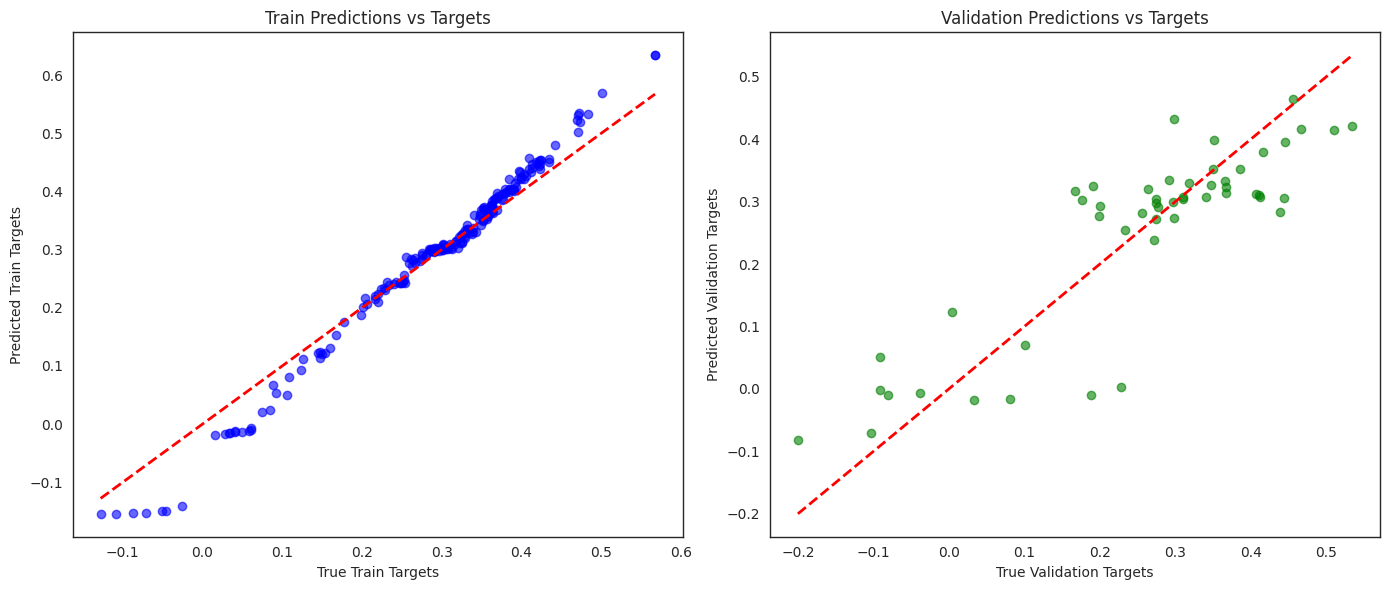

epochs=1000 num_samples=3000 wandb_api_key_path='wandb_api_key.txt' num_nodes_choices=[7258] cpu_per_worker=1 l1_lambda_max=0.1 raw_file_name='ALLFTD_dataset_for_nina_louisa_071124_age_adjusted.csv' pin_memory=True gat_num_layers=[2, 4, 6, 12] act_choices=['relu', 'tanh', 'sigmoid', 'elu'] weight_decay=0 gcn_hidden_channels=[8, 32, 128] num_nodes=7258 l1_lambda_min=1e-05 gat_v4_fc_dim=[[64, 128, 128, 32], [128, 256, 256, 64], [256, 512, 512, 128]] accumulate_grad_batches=1 mlp_plain_last=[True, False] grace_period=30 wandb_offline=False act='relu' lr_min=1e-06 batch_size=8 adj_thresh_choices=[0.2, 0.35, 0.5, 0.7, 0.9] dropout=0.1 sex=['M', 'F'] project='proteo' optimizer='Adam' use_master_nodes=False lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR'] mlp_norms=['batch_norm', 'layer_norm'] model='gat-v4' lr_max=0.1 seed=15990 model_grid_search=['gat-v4'] gat_heads=[1, 2, 4, 8] use_weights=False output_dir='/scratch/lcornelis/outputs' checkpoint_dir='/s

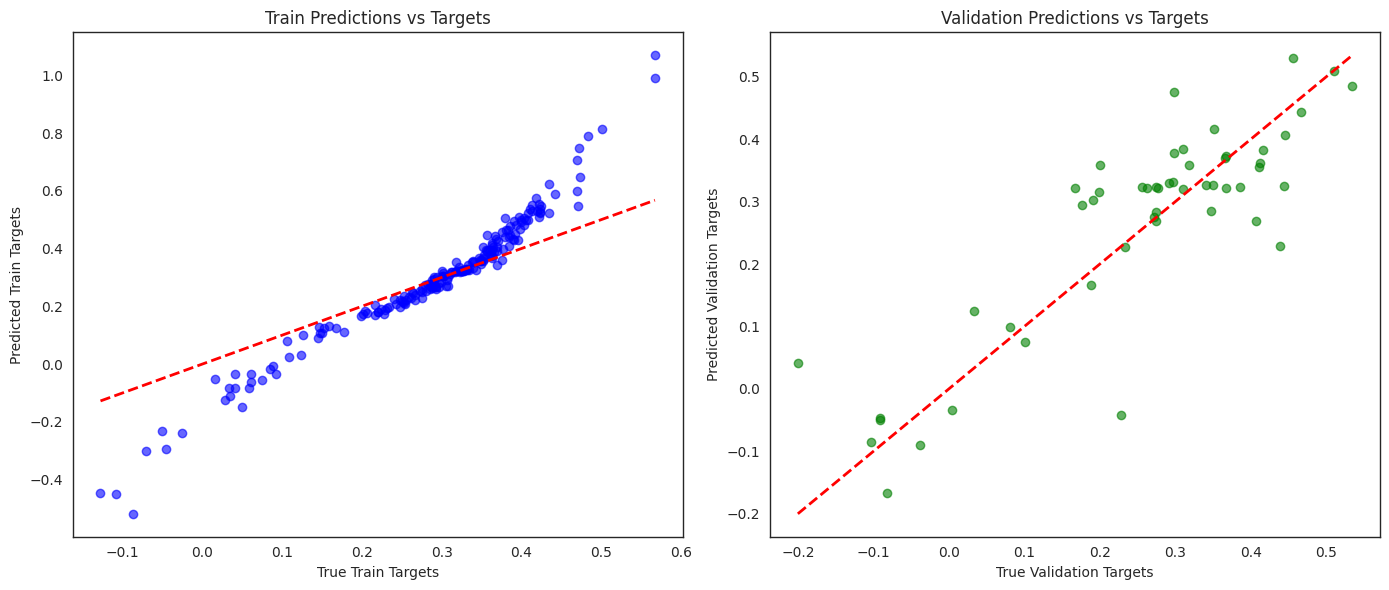

num_nodes_choices=[7258] gat-v4={'hidden_channels': [64, 128], 'heads': [2, 2], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation', 'age'], 'fc_dim': [64, 128, 128, 32], 'fc_dropout': 0.2, 'fc_act': 'tanh', 'weight_initializer': 'kaiming', 'num_layers': None, 'channel_list': None, 'norm': None, 'plain_last': None} checkpoint_dir='/scratch/lcornelis/outputs/checkpoints' gpu_per_worker=1 num_workers=16 trainer_accelerator='gpu' lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR'] gat_v4_fc_dim=[[64, 128, 128, 32], [128, 256, 256, 64], [256, 512, 512, 128]] mutation=['GRN', 'MAPT', 'C9orf72', 'CTL'] sex_specific_adj=False wandb_offline=False model_grid_search=['gat-v4'] act_choices=['relu', 'tanh', 'sigmoid', 'elu'] gat_num_layers=[2, 4, 6, 12] l1_lambda=9.77168796608117e-05 dataset_name='ftd' gat_v4_fc_act=['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu'] q_gpu=True optimizer='Adam' wgcna_mergeCutHeight=0.25 use_gpu=Tru

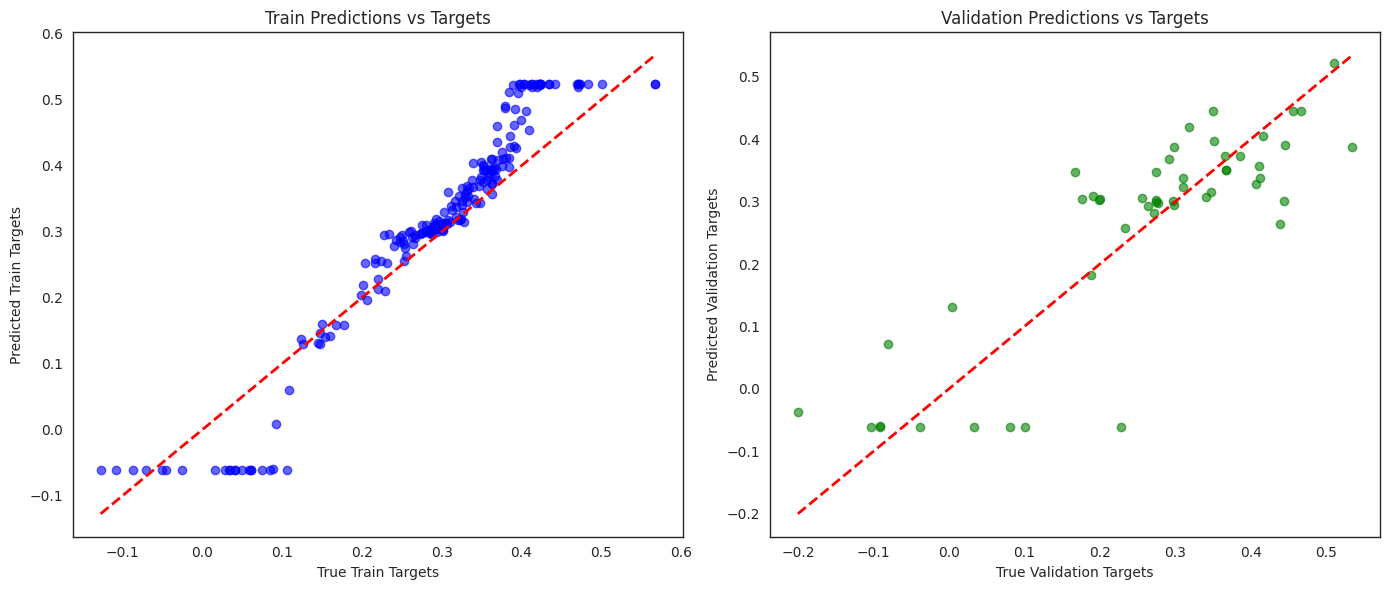

data_dir='/scratch/lcornelis/data/data_louisa' error_protein_file_name='bimodal_aptamers_for_removal.xlsx' wandb_offline=False ray_results_dir='/scratch/lcornelis/outputs/ray_results' gat_v4_hidden_channels=[[8, 16], [32, 64], [64, 128]] act='sigmoid' l1_lambda_min=1e-05 num_workers=16 use_weights_choices=[False] use_master_nodes=False l1_lambda=4.6334775691561934e-05 sex_specific_adj=False num_to_keep=2 lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR'] mutation_choices=[['GRN', 'MAPT', 'C9orf72', 'CTL']] gat_num_layers=[2, 4, 6, 12] log_every_n_steps=10 seed=30713 mlp={'channel_list': [7261, 32, 64, 128, 1], 'norm': 'batch_norm', 'plain_last': True} precision='32-true' accumulate_grad_batches=1 cpu_per_worker=1 mlp_norms=['batch_norm', 'layer_norm'] output_dir='/scratch/lcornelis/outputs' gcn_num_layers=[2, 3, 4] use_gpu=True gat_v4_fc_act=['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu'] dropout_choices=[0.1, 0.2, 0.5] gpu_per_worker=1 num_nodes_cho

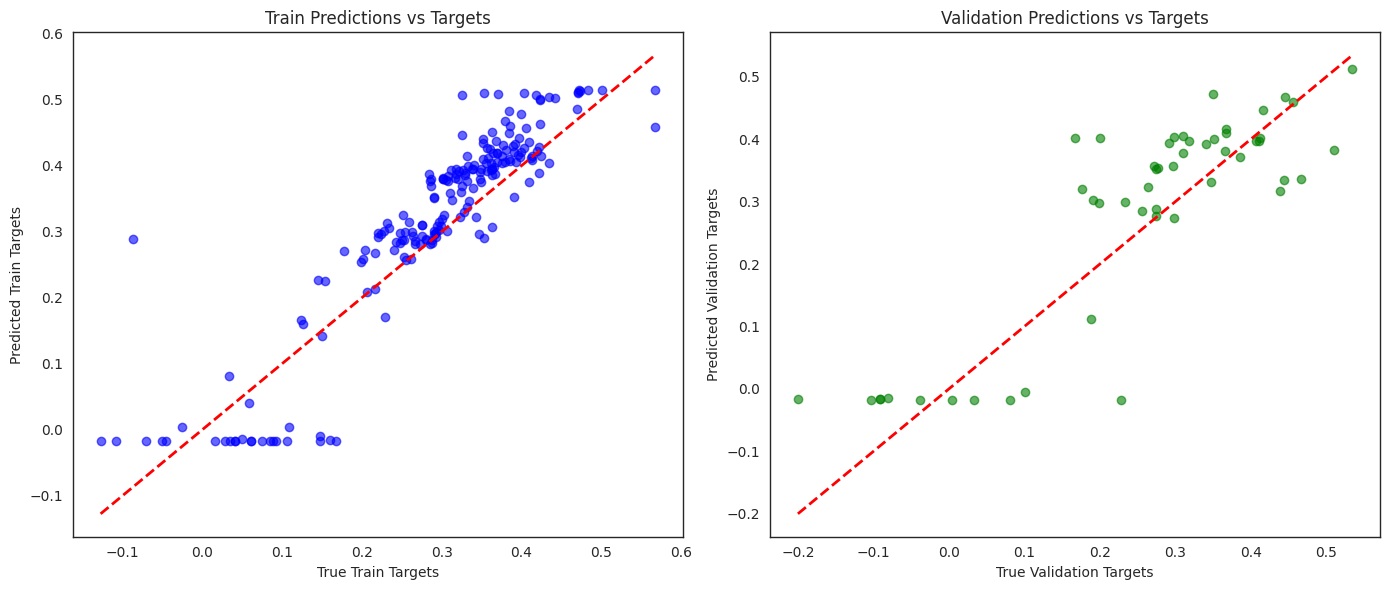

In [4]:
device = 'cpu'
# GLOBAL COG 1/7 RUNS:
model_1_global_cog = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-01-04_07-33-15/model=gat-v4,seed=18032_1104_act=elu,adj_thresh=0.5000,batch_size=16,dropout=0.2000,l1_lambda=0.0000,lr=0.0297,lr_scheduler=Cosine_2025-01-04_23-34-25/checkpoint_000732"
model_2_global_cog =  "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-01-04_07-33-15/model=gat-v4,seed=28465_1316_act=relu,adj_thresh=0.7000,batch_size=32,dropout=0.1000,l1_lambda=0.0000,lr=0.0048,lr_scheduler=Lambd_2025-01-05_02-38-06/checkpoint_000597"
model_3_global_cog = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-01-04_07-33-15/model=gat-v4,seed=15990_1874_act=relu,adj_thresh=0.5000,batch_size=8,dropout=0.1000,l1_lambda=0.0000,lr=0.0031,lr_scheduler=Lambda_2025-01-05_10-44-13/checkpoint_000151"
model_4_global_cog = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-01-04_07-33-15/model=gat-v4,seed=10356_755_act=elu,adj_thresh=0.9000,batch_size=32,dropout=0.2000,l1_lambda=0.0001,lr=0.0037,lr_scheduler=LambdaL_2025-01-04_17-37-31/checkpoint_000202"
model_8_global_cog = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-01-04_07-33-15/model=gat-v4,seed=30713_2726_act=sigmoid,adj_thresh=0.7000,batch_size=50,dropout=0.1000,l1_lambda=0.0000,lr=0.0019,lr_scheduler=Co_2025-01-05_23-26-40/checkpoint_000489"

global_cog_mean_42 = 0.28378350117326734
global_cog_std_42 = 0.13349438834419888

outputs = full_load_and_run_and_convert(model_1_global_cog, device, global_cog_mean_42, global_cog_std_42)
outputs = full_load_and_run_and_convert(model_2_global_cog, device, global_cog_mean_42, global_cog_std_42)
outputs = full_load_and_run_and_convert(model_3_global_cog, device, global_cog_mean_42, global_cog_std_42)
outputs = full_load_and_run_and_convert(model_4_global_cog, device, global_cog_mean_42, global_cog_std_42)
outputs = full_load_and_run_and_convert(model_8_global_cog, device, global_cog_mean_42, global_cog_std_42)


l1_lambda=1.5228298041685357e-05 use_master_nodes=False output_dir='/scratch/lcornelis/outputs' sex_specific_adj=False reduction_factor=6 q_gpu=True model_grid_search=['gat-v4'] grace_period=20 gcn_hidden_channels=[8, 32, 128] mlp_plain_last=[True, False] l1_lambda_max=0.1 l1_lambda_min=1e-05 sex_specific_adj_choices=[False] dataset_name='ftd' lr_max=0.1 ray_tmp_dir='/scratch/lcornelis/tmp' gat_heads=[1, 2, 4, 8] nodes_count=1 lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR'] optimizer='Adam' gcn={'num_layers': 3, 'hidden_channels': 32} trainer_accelerator='gpu' master_nodes=['sex', 'mutation', 'age'] accumulate_grad_batches=1 pin_memory=True modality='csf' root_dir='/home/lcornelis/code/proteo' data_dir='/scratch/lcornelis/data/data_louisa' random_state=42 cpu_per_worker=1 use_progress_bar=True mutation_choices=[['GRN', 'MAPT', 'C9orf72', 'CTL']] y_val='global_cog_slope' gat_v4_fc_act=['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu'] mlp_norms=['batc

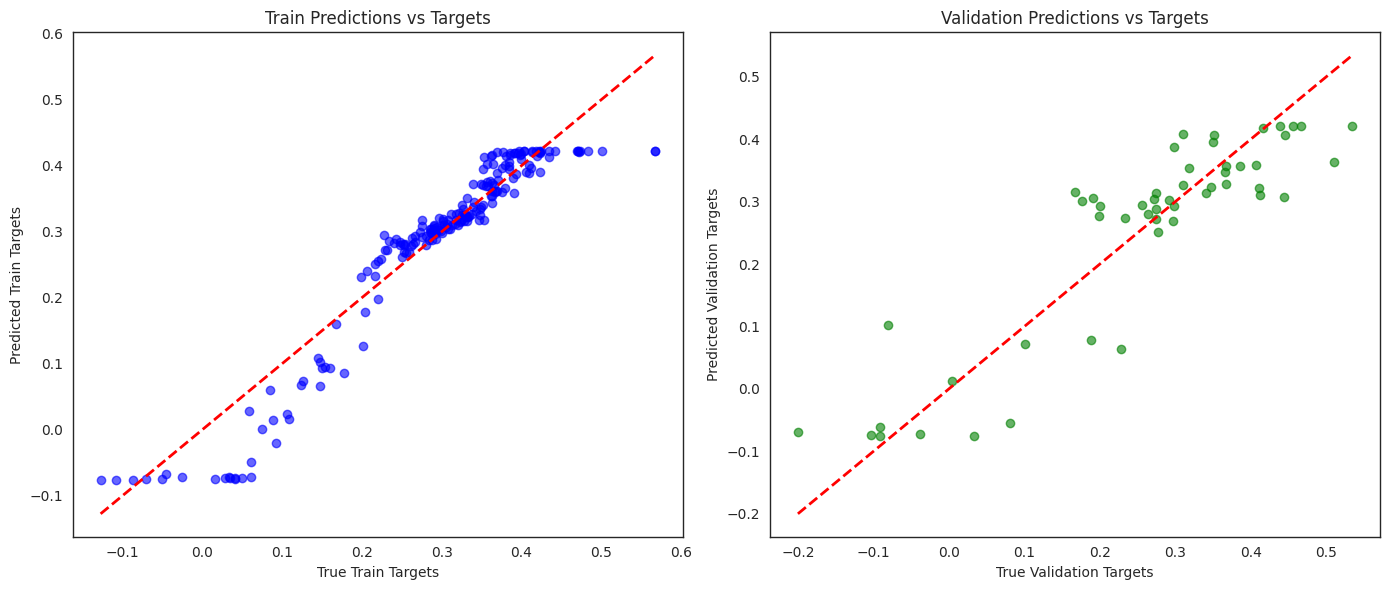

devices=[0, 1, 2, 3, 4, 5, 6, 7] batch_size_choices=[8, 16, 32, 50] gat_v4_hidden_channels=[[8, 16], [32, 64], [64, 128]] gat_v4_weight_initializer=['xavier', 'kaiming', 'orthogonal', 'truncated_normal'] num_to_keep=2 wandb_api_key_path='wandb_api_key.txt' seed=60449 mlp_norms=['batch_norm', 'layer_norm'] gat_hidden_channels=[8, 32, 128, 256] project='proteo' epochs=1000 lr_min=1e-05 l1_lambda_min=1e-05 log_every_n_steps=10 gat_v4_heads=[[2, 3], [2, 2], [4, 4]] num_nodes_choices=[7258] sync_batchnorm=False mlp_channel_lists=[[7261, 1], [7261, 1028, 1], [7261, 128, 64, 1], [7261, 1028, 128, 1], [7261, 1028, 256, 64, 1], [7261, 1028, 512, 128, 1], [7261, 1028, 256, 128, 64, 1]] gcn_hidden_channels=[8, 32, 128] modality_choices=['csf'] l1_lambda=2.5941461645294408e-05 use_master_nodes=False error_protein_file_name='bimodal_aptamers_for_removal.xlsx' master_nodes=['sex', 'mutation', 'age'] random_state=42 lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR']

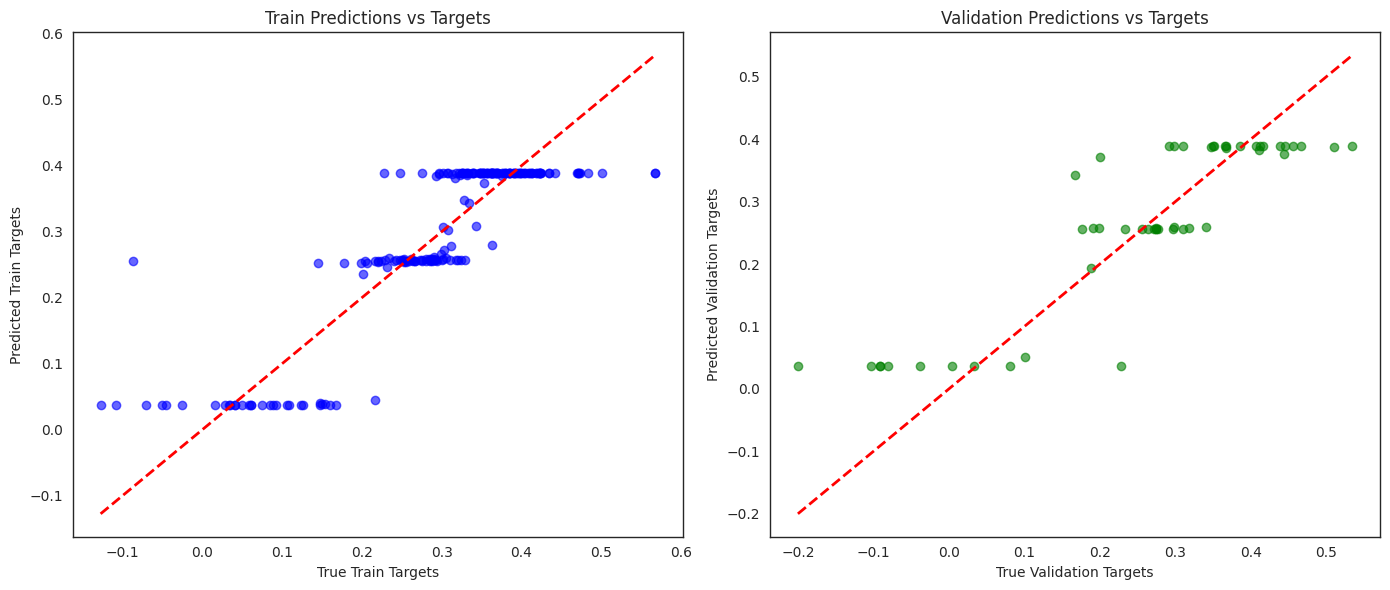

reduction_factor=6 gat_v4_fc_act=['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu'] num_nodes_choices=[7258] gcn_hidden_channels=[8, 32, 128] output_dir='/scratch/lcornelis/outputs' cpu_per_worker=1 lr=0.002394352645513035 root_dir='/home/lcornelis/code/proteo' modality_choices=['csf'] num_samples=4000 lr_max=0.1 mlp={'channel_list': [7261, 32, 64, 128, 1], 'norm': 'batch_norm', 'plain_last': True} mlp_norms=['batch_norm', 'layer_norm'] precision='32-true' seed=3126 num_nodes=7258 lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR'] wgcna_minModuleSize=10 error_protein_file_name='bimodal_aptamers_for_removal.xlsx' use_weights=False l1_lambda_min=1e-05 gat_hidden_channels=[8, 32, 128, 256] gpu_per_worker=1 data_dir='/scratch/lcornelis/data/data_louisa' gat_heads=[1, 2, 4, 8] checkpoint_dir='/scratch/lcornelis/outputs/checkpoints' gat={'num_layers': 2, 'hidden_channels': 256, 'heads': 4, 'v2': True} batch_size=32 lr_scheduler='LambdaLR' dropout_choices=[0.1

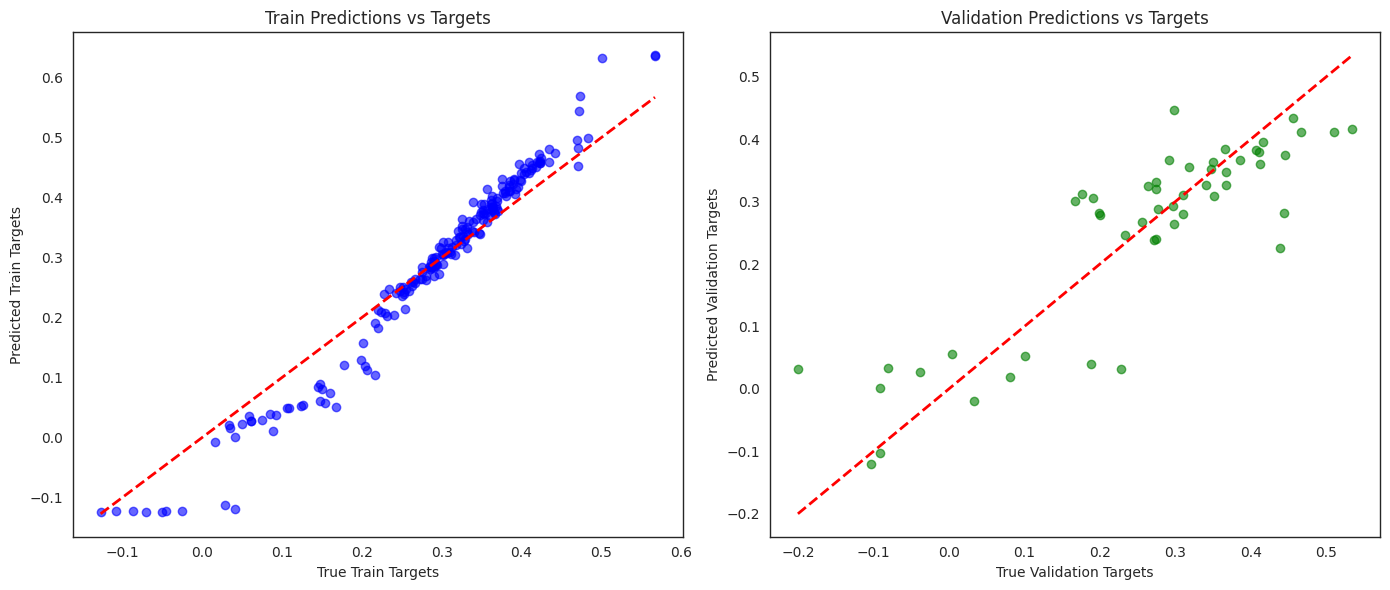

gat_heads=[1, 2, 4, 8] mlp={'channel_list': [7261, 32, 64, 128, 1], 'norm': 'batch_norm', 'plain_last': True} mlp_norms=['batch_norm', 'layer_norm'] lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'StepLR', 'CosineAnnealingLR'] weight_decay=0 num_nodes_choices=[7258] wandb_tmp_dir='/scratch/lcornelis/tmp' num_samples=4000 output_dir='/scratch/lcornelis/outputs' accumulate_grad_batches=1 wgcna_mergeCutHeight=0.25 gpu_per_worker=1 y_val_choices=['global_cog_slope'] cpu_per_worker=1 modality='csf' root_dir='/home/lcornelis/code/proteo' use_gpu=True model='gat-v4' gat_hidden_channels=[8, 32, 128, 256] log_every_n_steps=10 batch_size=16 act_choices=['relu', 'tanh', 'sigmoid', 'elu'] gat_v4_fc_act=['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu'] data_dir='/scratch/lcornelis/data/data_louisa' mutation=['GRN', 'MAPT', 'C9orf72', 'CTL'] sex_specific_adj=False lr=0.002264065235115911 random_state=42 use_weights_choices=[False] mlp_channel_lists=[[7261, 1], [7261, 1028, 1], [7261, 128, 64,

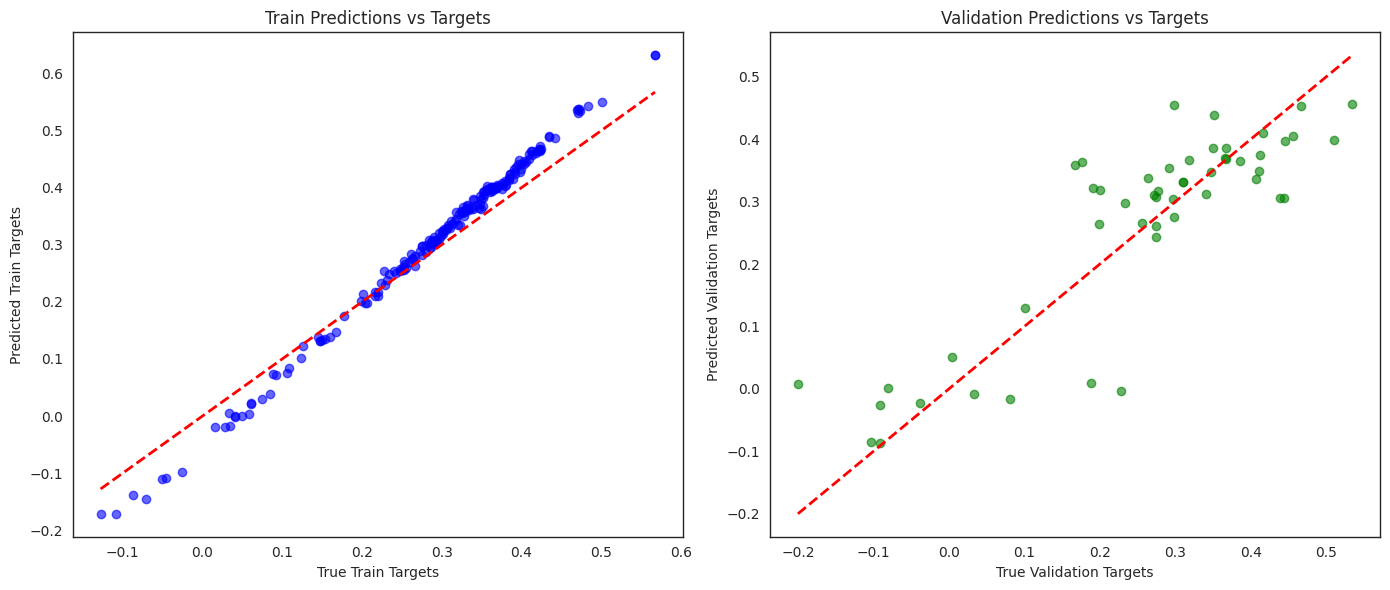

mlp={'channel_list': [7261, 32, 64, 128, 1], 'norm': 'batch_norm', 'plain_last': True} l1_lambda_min=1e-05 wandb_tmp_dir='/scratch/lcornelis/tmp' wgcna_mergeCutHeight=0.25 accumulate_grad_batches=1 lr=0.0040444485319074824 batch_size=8 error_protein_file_name='bimodal_aptamers_for_removal.xlsx' gcn_hidden_channels=[8, 32, 128] lr_min=1e-05 l1_lambda_max=0.1 act_choices=['relu', 'tanh', 'sigmoid', 'elu'] master_nodes=['sex', 'mutation', 'age'] grace_period=20 ray_tmp_dir='/scratch/lcornelis/tmp' gat={'num_layers': 2, 'hidden_channels': 256, 'heads': 4, 'v2': True} use_master_nodes=False num_nodes=7258 dropout=0.5 devices=[0, 1, 2, 3, 4, 5, 6, 7] mlp_channel_lists=[[7261, 1], [7261, 1028, 1], [7261, 128, 64, 1], [7261, 1028, 128, 1], [7261, 1028, 256, 64, 1], [7261, 1028, 512, 128, 1], [7261, 1028, 256, 128, 64, 1]] trainer_accelerator='gpu' wgcna_minModuleSize=10 ray_results_dir='/scratch/lcornelis/outputs/ray_results' dropout_choices=[0.1, 0.2, 0.5] lr_scheduler='CosineAnnealingLR' use

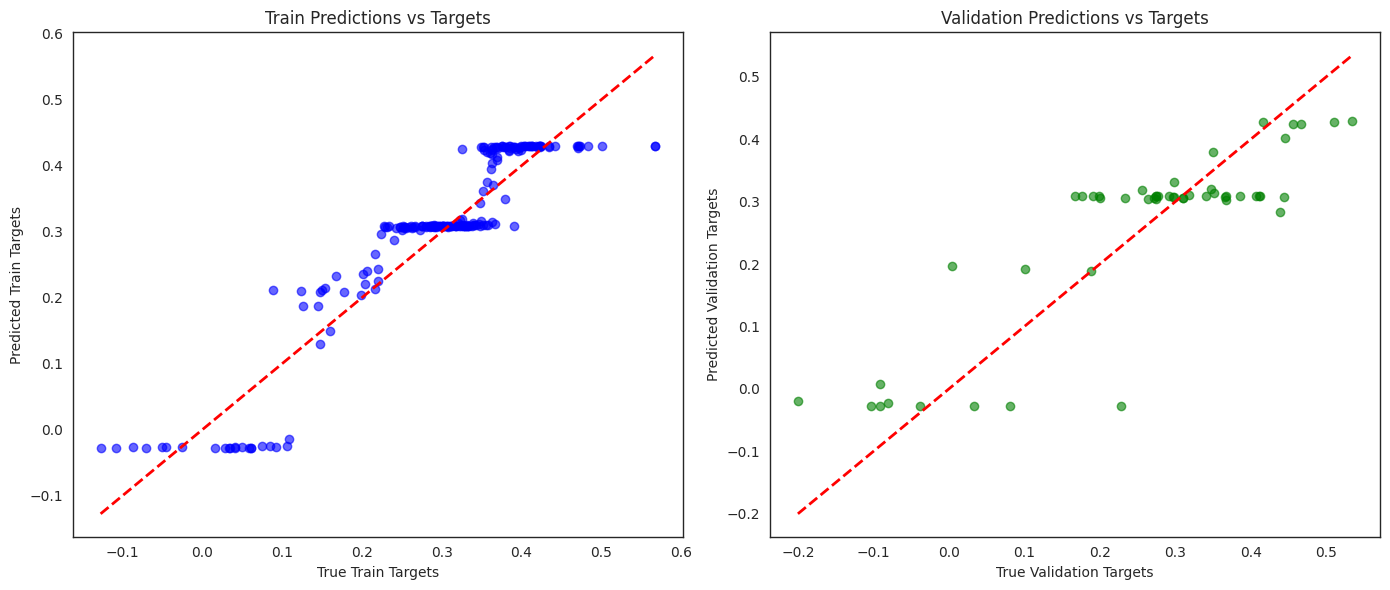

model='gat-v4' adj_thresh_choices=[0.2, 0.35, 0.5, 0.7, 0.9] precision='32-true' q_gpu=True sync_batchnorm=False wgcna_mergeCutHeight=0.25 mutation_choices=[['GRN', 'MAPT', 'C9orf72', 'CTL']] seed=4437 accumulate_grad_batches=1 error_protein_file_name='bimodal_aptamers_for_removal.xlsx' num_workers=16 log_every_n_steps=10 sex_specific_adj=False modality='csf' sex_choices=[['M', 'F']] checkpoint_every_n_epochs_train=1 gcn_num_layers=[2, 3, 4] num_samples=4000 grace_period=20 reduction_factor=6 gat_v4_fc_act=['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu'] sex_specific_adj_choices=[False] l1_lambda_min=1e-05 ray_results_dir='/scratch/lcornelis/outputs/ray_results' num_to_keep=2 wandb_tmp_dir='/scratch/lcornelis/tmp' l1_lambda=0.00010718610455712317 use_gpu=True checkpoint_dir='/scratch/lcornelis/outputs/checkpoints' mlp_norms=['batch_norm', 'layer_norm'] lr_max=0.1 gpu_per_worker=1 use_master_nodes=False wgcna_minModuleSize=10 lr_scheduler='CosineAnnealingLR' batch_size_choices=[8, 16, 3

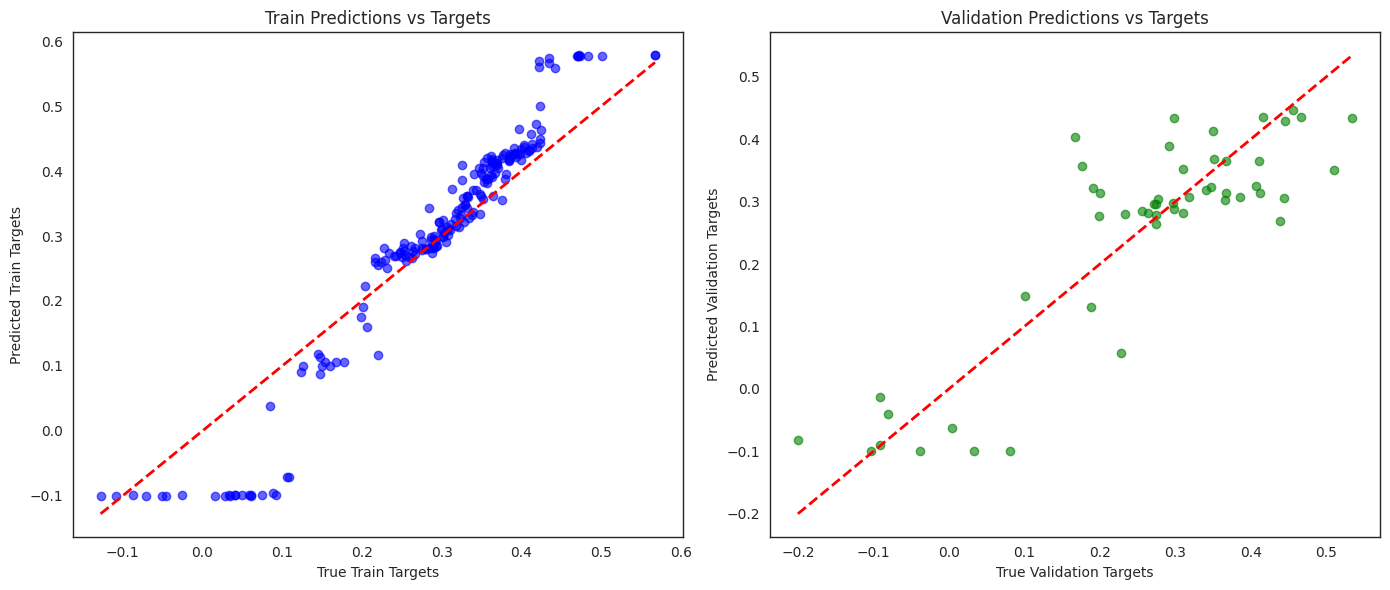

In [4]:
device = 'cpu'
# global cog 1/9 RUNS:
model_1_global_cog_1_9 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-01-07_15-32-23/model=gat-v4,seed=13764_2613_act=relu,adj_thresh=0.7000,batch_size=32,dropout=0.5000,l1_lambda=0.0000,lr=0.0245,lr_scheduler=Cosin_2025-01-08_17-04-27/checkpoint_000582"
model_2_global_cog_1_9 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-01-07_15-32-23/model=gat-v4,seed=60449_1260_act=relu,adj_thresh=0.5000,batch_size=8,dropout=0.5000,l1_lambda=0.0000,lr=0.0114,lr_scheduler=Cosine_2025-01-08_03-53-59/checkpoint_000268"
model_3_global_cog_1_9 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-01-07_15-32-23/model=gat-v4,seed=3126_3057_act=tanh,adj_thresh=0.7000,batch_size=32,dropout=0.1000,l1_lambda=0.0001,lr=0.0024,lr_scheduler=Lambda_2025-01-08_23-23-31/checkpoint_000329"
model_4_global_cog_1_9 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-01-07_15-32-23/model=gat-v4,seed=17757_564_act=elu,adj_thresh=0.5000,batch_size=16,dropout=0.2000,l1_lambda=0.0000,lr=0.0023,lr_scheduler=CosineA_2025-01-07_19-13-38/checkpoint_000808"
model_5_global_cog_1_9 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-01-07_15-32-23/model=gat-v4,seed=23867_3410_act=elu,adj_thresh=0.3500,batch_size=8,dropout=0.5000,l1_lambda=0.0000,lr=0.0040,lr_scheduler=CosineA_2025-01-09_03-18-02/checkpoint_000222"
model_6_global_cog_1_9 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-01-07_15-32-23/model=gat-v4,seed=4437_408_act=elu,adj_thresh=0.5000,batch_size=16,dropout=0.5000,l1_lambda=0.0001,lr=0.0017,lr_scheduler=CosineAn_2025-01-07_17-31-13/checkpoint_000264"



global_cog_mean_42 = 0.28378350117326734
global_cog_std_42 = 0.13349438834419888

outputs = full_load_and_run_and_convert(model_1_global_cog_1_9, device, global_cog_mean_42, global_cog_std_42)
outputs = full_load_and_run_and_convert(model_2_global_cog_1_9, device, global_cog_mean_42, global_cog_std_42)
outputs = full_load_and_run_and_convert(model_3_global_cog_1_9, device, global_cog_mean_42, global_cog_std_42)
outputs = full_load_and_run_and_convert(model_4_global_cog_1_9, device, global_cog_mean_42, global_cog_std_42)
outputs = full_load_and_run_and_convert(model_5_global_cog_1_9, device, global_cog_mean_42, global_cog_std_42)
outputs = full_load_and_run_and_convert(model_6_global_cog_1_9, device, global_cog_mean_42, global_cog_std_42)



In [4]:
device = 'cpu'
model_7_global_cog_1_9 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-01-07_15-32-23/model=gat-v4,seed=32798_2424_act=elu,adj_thresh=0.9000,batch_size=8,dropout=0.1000,l1_lambda=0.0000,lr=0.0011,lr_scheduler=LambdaL_2025-01-08_15-26-07/checkpoint_000565"
model_8_global_cog_1_9 = "/scratch/lcornelis/outputs/ray_results/TorchTrainer_2025-01-07_15-32-23/model=gat-v4,seed=36107_2942_act=elu,adj_thresh=0.2000,batch_size=16,dropout=0.2000,l1_lambda=0.0000,lr=0.0014,lr_scheduler=Cosine_2025-01-08_21-28-50/checkpoint_000494"

outputs = full_load_and_run_and_convert(model_7_global_cog_1_9, device, global_cog_mean_42, global_cog_std_42)
outputs = full_load_and_run_and_convert(model_8_global_cog_1_9, device, global_cog_mean_42, global_cog_std_42)


NameError: name 'global_cog_mean_42' is not defined

In [3]:
# Sex_specific_adj no sex
checkpoint1 = "/home/lcornelis/code/proteo/outputs/ray_results/TorchTrainer_2024-10-15_15-51-21/model=gat-v4,seed=15680_180_act=tanh,adj_thresh=0.3500,batch_size=32,dropout=0.1000,l1_lambda=0.0007,lr=0.0005,lr_scheduler=Lambda_2024-10-15_15-51-23/checkpoint_000001"
checkpoint2 = "/home/lcornelis/code/proteo/outputs/ray_results/TorchTrainer_2024-10-15_15-51-21/model=gat-v4,seed=60527_226_act=tanh,adj_thresh=0.9000,batch_size=32,dropout=0,l1_lambda=0.0025,lr=0.0006,lr_scheduler=LambdaLR,mo_2024-10-15_17-14-43/checkpoint_000006"
full_load_and_run_and_convert(checkpoint1 ,device, csf_all_mean, csf_all_std)

adj_thresh_choices=[0.1, 0.2, 0.35, 0.5, 0.7, 0.9] dropout=0.1 gat-v4={'hidden_channels': [8, 16], 'heads': [4, 4], 'use_layer_norm': True, 'which_layer': ['layer1', 'layer2', 'layer3', 'sex', 'mutation'], 'fc_dim': [128, 256, 256, 64], 'fc_dropout': 0.1, 'fc_act': 'relu', 'weight_initializer': 'orthogonal', 'num_layers': None} gat_hidden_channels=[8, 32, 128, 256] output_dir='/home/lcornelis/code/proteo/outputs' lr_min=1e-06 gcn_num_layers=[2, 3, 4] lr_scheduler='LambdaLR' nodes_count=1 raw_file_name='ALLFTD_dataset_for_nina_louisa_071124_age_adjusted.csv' gpu_per_worker=1 gcn={'num_layers': 3, 'hidden_channels': 32} num_workers=16 trainer_accelerator='gpu' use_progress_bar=True gat_num_layers=[2, 4, 6, 12] modality_choices=['csf'] batch_size=32 seed=15680 lr_scheduler_choices=['LambdaLR', 'ReduceLROnPlateau', 'ExponentialLR', 'StepLR', 'CosineAnnealingLR'] gat_heads=[1, 2, 4, 8] reduction_factor=6 num_nodes=7258 lr=0.0005472969709054848 master_nodes=['sex', 'mutation', 'age'] epochs=

TypeError: expected 0 arguments, got 1

In [5]:
#Sanity check
def compute_manual_mse(val_preds, val_targets):
    """
    Manually computes the Mean Squared Error (MSE) for the given predictions and targets.

    Parameters:
    val_preds (list of list of torch.Tensor): The predicted values.
    val_targets (list of list of torch.Tensor): The true target values.

    Returns:
    float: The computed Mean Squared Error.
    """
   # Compute the squared differences
    squared_diffs = (val_preds - val_targets) ** 2

    # Compute the mean of the squared differences
    mse = squared_diffs.mean().item()

    return mse

print(compute_manual_mse(val_preds, val_targets))

0.2644430100917816


In [13]:
import os
import torch
import torch.nn.functional as F
import train as proteo_train

# Define a function to load the checkpoint and calculate MSE
def load_checkpoint_and_calculate_mse(relative_checkpoint_path, levels_up=5):
    # Get the current script directory
    current_directory = os.getcwd()
    
    # Navigate up the specified number of levels
    for _ in range(levels_up):
        current_directory = os.path.dirname(current_directory)
    
    # Construct the full path to the checkpoint
    checkpoint_path = os.path.join(current_directory, relative_checkpoint_path)
    print(f"Loading checkpoint from: {checkpoint_path}")

    # Check if the file exists to avoid errors
    if not os.path.isfile(checkpoint_path):
        raise FileNotFoundError(f"Checkpoint file not found: {checkpoint_path}")

    # Load the checkpoint
    checkpoint = torch.load(checkpoint_path)
    print("Checkpoint keys:", checkpoint.keys())
    print("checkpoint state_dict keys:", checkpoint['state_dict'].keys())

    module = proteo_train.Proteo.load_from_checkpoint(checkpoint_path)

    # Access the attributes
    # best_val_pred = module.best_val_pred
    # print("best_val_pred:", best_val_pred)
    # # print("min_val loss:", module.val_loss)
    # best_val_target = module.best_val_target
    # best_train_pred = module.best_train_pred
    # best_train_target = module.best_train_target

    # # Calculate MSE for validation and training
    # mse_val = F.mse_loss(best_val_pred, best_val_target).item()
    # mse_train = F.mse_loss(best_train_pred, best_train_target).item()

    return module, checkpoint

# Example usage
relative_checkpoint_path = '/scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-07-31_16-47-02/model=gat-v4,seed=19543_0_act=relu,adj_thresh=0.1000,batch_size=8,dropout=0,l1_lambda=0.0000,lr=0.1000,lr_scheduler=LambdaLR,modal_2024-07-31_16-47-02/checkpoint_000001/checkpoint.cpkt'
module, checkpoint = load_checkpoint_and_calculate_mse(relative_checkpoint_path)
# print(f"MSE Loss for validation set: {mse_val}")
# print(f"MSE Loss for training set: {mse_train}")


Loading checkpoint from: /scratch/lcornelis/outputs/ray_results/TorchTrainer_2024-07-31_15-31-35/model=gat-v4,seed=19543_0_act=relu,adj_thresh=0.1000,batch_size=8,dropout=0,l1_lambda=0.0000,lr=0.1000,lr_scheduler=LambdaLR,modal_2024-07-31_15-31-36/checkpoint_000001/checkpoint.ckpt
Checkpoint keys: dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers', 'hparams_name', 'hyper_parameters'])
checkpoint state_dict keys: odict_keys(['model.convs.0.att_src', 'model.convs.0.att_dst', 'model.convs.0.bias', 'model.convs.0.lin.weight', 'model.convs.1.att_src', 'model.convs.1.att_dst', 'model.convs.1.bias', 'model.convs.1.lin.weight', 'model.pools.0.weight', 'model.pools.0.bias', 'model.pools.1.weight', 'model.pools.1.bias', 'model.layer_norm.weight', 'model.layer_norm.bias', 'model.encoder.0.0.weight', 'model.encoder.0.0.bias', 'model.encoder.1.0.weight', 'model.encoder.1.0.bias', 'model.encoder.2.0.weight', 'model.